bclc
# British Columbia iGaming Segmentation

## i) Libraries

In [1]:
#Base
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots as sp

#Data processing
from datetime import datetime
import statsmodels.api as sm

## ii) Data Wrangling

In [2]:
# dfFY221 = pd.read_csv('BC FY22 P1.csv', index_col=0).reset_index()
# dfFY222 = pd.read_csv('BC FY22 P2.csv', index_col=0).reset_index()
# dfFY223 = pd.read_csv('BC FY22 P3.csv', index_col=0).reset_index()
# dfFY224 = pd.read_csv('BC FY22 P4.csv', index_col=0).reset_index()
# dfFY225 = pd.read_csv('BC FY22 P5.csv', index_col=0).reset_index()

# dfFY231 = pd.read_csv('BC FY23 P1.csv', index_col=0).reset_index()
# dfFY232 = pd.read_csv('BC FY23 P2.csv', index_col=0).reset_index()
# dfFY233 = pd.read_csv('BC FY23 P3.csv', index_col=0).reset_index()
# dfFY234 = pd.read_csv('BC FY23 P4.csv', index_col=0).reset_index()
# dfFY235 = pd.read_csv('BC FY23 P5.csv', index_col=0).reset_index()
# dfFY236 = pd.read_csv('BC FY23 P6.csv', index_col=0).reset_index()

dfFY241 = pd.read_csv('BC FY24 P1.csv', index_col=0).reset_index()
dfFY242 = pd.read_csv('BC FY24 P2.csv', index_col=0).reset_index()
dfFY243 = pd.read_csv('BC FY24 P3.csv', index_col=0).reset_index()

#frames=[dfFY221,dfFY222,dfFY223,dfFY224,dfFY225,dfFY231,dfFY232,dfFY233,dfFY234,dfFY235,dfFY236,dfFY241,dfFY242,dfFY243]
frames=[dfFY241,dfFY242,dfFY243]

df = pd.concat(frames)

df.shape

(2711406, 42)

In [3]:
df=df.fillna(0)

In [256]:
df.tail(10)

Date  Week  DayWeek  FiscalYear  FiscalPeriod  FiscalWeek  \
711396  20231008    41        1        2024             7          29   
711397  20231008    41        1        2024             7          29   
711398  20231009    41        2        2024             7          29   
711399  20231008    41        1        2024             7          29   
711400  20231008    41        1        2024             7          29   
711401  20231008    41        1        2024             7          29   
711402  20231009    41        2        2024             7          29   
711403  20231009    41        2        2024             7          29   
711404  20231009    41        2        2024             7          29   
711405  20231009    41        2        2024             7          29   

         Player      Jurisdiction  CasinoID  StartDate  ...  P_PaidAmt  \
711396  7825165  British Columbia         0   20231008  ...        0.0   
711397  7825289  British Columbia         0   20231008  ...        0.0   
711398  7825289  British Columbia         0   20231008  ...        0.0   
711399  7825361  British Columbia         0   20231008  ...        0.0   
711400  7825393  British Columbia         0   20231008  ...        0.0   
711401  7825719  British Columbia         0   20231008  ...        0.0   
711402  7826139  British Columbia         0   20231009  ...        0.0   
711403  7826329  British Columbia         0   20231009  ...        0.0   
711404  7826393  British Columbia         0   20231009  ...        0.0   
711405  7826425  British Columbia         0   20231009  ...        0.0   

        L_PaidAmt  T_PaidAmt  PromoAmt  S_PromoAmt  P_PromoAmt  L_PromoAmt  \
711396      491.0        0.0       0.0         0.0         0.0         0.0   
711397        0.0        0.0      20.0        20.0         0.0         0.0   
711398        0.0        0.0       0.0         0.0         0.0         0.0   
711399        0.0        0.0       0.0         0.0         0.0         0.0   
711400        0.0        0.0       0.0         0.0         0.0         0.0   
711401      120.0        0.0      20.0         0.0         0.0        20.0   
711402        0.0     2566.0      20.0         0.0         0.0         0.0   
711403        3.0        0.0       0.0         0.0         0.0         0.0   
711404      462.5        0.0       0.0         0.0         0.0         0.0   
711405        0.0        0.0      10.0         0.0        10.0         0.0   

        T_PromoAmt  Encore  CRM  
711396         0.0     0.0  0.0  
711397         0.0     0.0  0.0  
711398         0.0     0.0  0.0  
711399         0.0     0.0  0.0  
711400         0.0     0.0  0.0  
711401         0.0     0.0  0.0  
711402        20.0     0.0  0.0  
711403         0.0     0.0  0.0  
711404         0.0     0.0  0.0  
711405         0.0     0.0  0.0  

[10 rows x 42 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2711406 entries, 0 to 711405
Data columns (total 42 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Date             int64  
 1   Week             int64  
 2   DayWeek          int64  
 3   FiscalYear       int64  
 4   FiscalPeriod     int64  
 5   FiscalWeek       int64  
 6   Player           int64  
 7   Jurisdiction     object 
 8   CasinoID         int64  
 9   StartDate        int64  
 10  SessionTimeHr    float64
 11  DepositAmt       float64
 12  WithdrawalAmt    float64
 13  ProductCount     int64  
 14  S_ProductC       int64  
 15  P_ProductC       int64  
 16  L_ProductC       int64  
 17  T_ProductC       int64  
 18  NewProductCount  int64  
 19  S_NewProductC    int64  
 20  P_NewProductC    int64  
 21  L_NewProductC    int64  
 22  T_NewProductC    int64  
 23  NetWin           float64
 24  NewNetWin        float64
 25  S_NetWin         float64
 26  P_NetWin         float64
 27  L_NetWin     

In [6]:
df0=df.copy()

## iii) Adding columns:


#### DualChannel and SingleChannel players

In [7]:
# df0['DualChannel'] = np.where(df0['CasinoID']>0,1,0)
# df0['SingleChannel'] = np.where(df0['DualChannel']==1,0,1)

#### NewPlayers

In [8]:
df0['NewPlayer'] = ((~df.duplicated(subset=['Player', 'StartDate'], keep='first') & (df['StartDate'] <= df['Date'])& (df['StartDate'] >= 20210401))).astype(int)
df0.head(1)

Date  Week  DayWeek  FiscalYear  FiscalPeriod  FiscalWeek  Player  \
0  20230425    17        3        2024             2           5     101   

       Jurisdiction  CasinoID  StartDate  ...  L_PaidAmt  T_PaidAmt  PromoAmt  \
0  British Columbia         1   20050402  ...     1000.0        0.0       0.0   

   S_PromoAmt  P_PromoAmt  L_PromoAmt  T_PromoAmt  Encore  CRM  NewPlayer  
0         0.0         0.0         0.0         0.0     0.0  0.0          0  

[1 rows x 43 columns]

In [9]:
df0[df0['FiscalYear']==2024]['NewPlayer'].sum()

16558

#### PlayerLife
Also added Date2 and StartDate2 in date format

In [10]:
date_format='%Y%m%d'
df0['Date2']=pd.to_datetime(df0['Date'],format=date_format).dt.date
df0['StartDate2']=pd.to_datetime(df0['StartDate'],format=date_format).dt.date
df0['PlayerLife'] = (df0['Date2'] - df0['StartDate2']).dt.days
df0['PlayerLifeYears'] = df0['PlayerLife']/365

#### OtherPromo

In [11]:
df0['OtherPromo']=df0['PromoAmt']-df0['CRM']-df0['Encore']

In [12]:
df0.head(1)

Date  Week  DayWeek  FiscalYear  FiscalPeriod  FiscalWeek  Player  \
0  20230425    17        3        2024             2           5     101   

       Jurisdiction  CasinoID  StartDate  ...  L_PromoAmt  T_PromoAmt  Encore  \
0  British Columbia         1   20050402  ...         0.0         0.0     0.0   

   CRM  NewPlayer       Date2  StartDate2  PlayerLife  PlayerLifeYears  \
0  0.0          0  2023-04-25  2005-04-02        6597        18.073973   

   OtherPromo  
0         0.0  

[1 rows x 48 columns]

# 1. Data Exploration

In [13]:
df1=df0.copy()

In [14]:
df1=df1.groupby(['FiscalYear'])['NetWin'].sum().reset_index()
df1

FiscalYear        NetWin
0        2024  1.629094e+08

In [15]:
# Initialize figure
fig1 = go.Figure()


# Add traces
fig1.add_trace(go.Bar(
        x=df1[df1['FiscalYear']==2024]['FiscalYear'],
        y=df1[df1['FiscalYear']==2024]['NetWin'],
        marker_color='#F58518'
        ))
# Add traces
fig1.add_trace(go.Bar(
        x=df1[df1['FiscalYear']==2022]['FiscalYear'],
        y=df1[df1['FiscalYear']==2022]['NetWin'],
        marker_color='#4C78A8'
        ))

# Update xaxis properties
fig1.update_xaxes(title_text='Year',
                 tick0=0,
                 dtick=1,
                # autorange='reversed' 
                )


# Update yaxis properties
fig1.update_yaxes(title_text='NetWin',
                tickformat=",",
                tickprefix="$")


# Update general layout
fig1.update_layout(title_text='BC - Year Over Year Net Win',
                 showlegend=False)

fig1.show()

# 2. Preparing the dataframe for Segmentation

### 2.1 Groupby by player

In [16]:
segmentation_df = df[(df['FiscalYear'] == 2024)&(df['StartDate'] <= 20230401)].copy()

In [17]:
segmentation_df = segmentation_df.drop(['Jurisdiction','FiscalYear'], axis=1)

In [18]:
segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2674168 entries, 0 to 709102
Data columns (total 40 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Date             int64  
 1   Week             int64  
 2   DayWeek          int64  
 3   FiscalPeriod     int64  
 4   FiscalWeek       int64  
 5   Player           int64  
 6   CasinoID         int64  
 7   StartDate        int64  
 8   SessionTimeHr    float64
 9   DepositAmt       float64
 10  WithdrawalAmt    float64
 11  ProductCount     int64  
 12  S_ProductC       int64  
 13  P_ProductC       int64  
 14  L_ProductC       int64  
 15  T_ProductC       int64  
 16  NewProductCount  int64  
 17  S_NewProductC    int64  
 18  P_NewProductC    int64  
 19  L_NewProductC    int64  
 20  T_NewProductC    int64  
 21  NetWin           float64
 22  NewNetWin        float64
 23  S_NetWin         float64
 24  P_NetWin         float64
 25  L_NetWin         float64
 26  T_NetWin         float64
 27  PaidAmt      

In [19]:
# Calculate the 'PlayerLife' column
date_format='%Y%m%d'
segmentation_df['Date2']=pd.to_datetime(segmentation_df['Date'],format=date_format).dt.date
segmentation_df['StartDate2']=pd.to_datetime(segmentation_df['StartDate'],format=date_format).dt.date
segmentation_df['PlayerLife'] = (max(segmentation_df['Date2']) - segmentation_df['StartDate2']).dt.days
segmentation_df['PlayerLifeYears'] = segmentation_df['PlayerLife']/365

In [20]:
segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2674168 entries, 0 to 709102
Data columns (total 44 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Date             int64  
 1   Week             int64  
 2   DayWeek          int64  
 3   FiscalPeriod     int64  
 4   FiscalWeek       int64  
 5   Player           int64  
 6   CasinoID         int64  
 7   StartDate        int64  
 8   SessionTimeHr    float64
 9   DepositAmt       float64
 10  WithdrawalAmt    float64
 11  ProductCount     int64  
 12  S_ProductC       int64  
 13  P_ProductC       int64  
 14  L_ProductC       int64  
 15  T_ProductC       int64  
 16  NewProductCount  int64  
 17  S_NewProductC    int64  
 18  P_NewProductC    int64  
 19  L_NewProductC    int64  
 20  T_NewProductC    int64  
 21  NetWin           float64
 22  NewNetWin        float64
 23  S_NetWin         float64
 24  P_NetWin         float64
 25  L_NetWin         float64
 26  T_NetWin         float64
 27  PaidAmt      

In [21]:
df_full = segmentation_df[(segmentation_df['Date2'] >= (segmentation_df['Date2'].max() - pd.Timedelta(days=395)))
                        & (segmentation_df['Date2'] <= (segmentation_df['Date2'].max()))]
df_full = df_full[['Player','StartDate','PlayerLifeYears']]
df_full = df_full.drop_duplicates()

In [22]:
df_full

Player  StartDate  PlayerLifeYears
0           101   20050402        18.531507
47          103   20210216         2.643836
50          105   20110520        12.397260
57          133   20090630        14.284932
81          183   20060911        17.087671
...         ...        ...              ...
701878  7638070   20080406        15.517808
706591  7686443   20150624         8.298630
706610  7686987   20170514         6.408219
709053  7731570   20141122         8.884932
709081  7731866   20220406         1.509589

[84283 rows x 3 columns]

In [23]:
columns_to_aggregate = ['SessionTimeHr', 'DepositAmt', 'WithdrawalAmt', 'ProductCount', 'PaidAmt', 'S_PaidAmt', 'P_PaidAmt', 'L_PaidAmt', 'T_PaidAmt','Encore', 'CRM']
# Calculate aggregations for the previous 395 to 31 days and add suffix '_Pre'
agg_functions_pre = {col: 'mean' for col in columns_to_aggregate}
df_pre = segmentation_df[(segmentation_df['Date2'] >= (segmentation_df['Date2'].max() - pd.Timedelta(days=365)))
                        & (segmentation_df['Date2'] <= (segmentation_df['Date2'].max() - pd.Timedelta(days=0)))]
df_pre = df_pre.groupby(['Player']).agg(agg_functions_pre).reset_index()
df_pre = df_pre.rename(columns={col: col + '_Pre' for col in columns_to_aggregate})

# Calculate aggregations for the previous 30 days and add suffix '_Post'
agg_functions_post = {col: 'mean' for col in columns_to_aggregate}
df_post = segmentation_df[segmentation_df['Date2'] >= (segmentation_df['Date2'].max() - pd.Timedelta(days=30))]
df_post = df_post.groupby(['Player']).agg(agg_functions_post).reset_index()
df_post = df_post.rename(columns={col: col + '_Post' for col in columns_to_aggregate})

# Merge the results back into the original DataFrame
df_full = df_full.merge(df_pre, on=['Player'], how='left')
df_full = df_full.merge(df_post, on=['Player'], how='left')
df_full

Player  StartDate  PlayerLifeYears  SessionTimeHr_Pre  DepositAmt_Pre  \
0          101   20050402        18.531507           1.212766       85.106383   
1          103   20210216         2.643836           2.666667      333.333333   
2          105   20110520        12.397260           0.500000       50.000000   
3          133   20090630        14.284932           0.958333      211.458333   
4          183   20060911        17.087671           2.405063      210.759494   
...        ...        ...              ...                ...             ...   
84278  7638070   20080406        15.517808           1.000000        6.250000   
84279  7686443   20150624         8.298630           3.071429       19.285714   
84280  7686987   20170514         6.408219           3.428571       71.428571   
84281  7731570   20141122         8.884932           0.500000        2.500000   
84282  7731866   20220406         1.509589           2.363636       28.363636   

       WithdrawalAmt_Pre  ProductCount_Pre  PaidAmt_Pre  S_PaidAmt_Pre  \
0             -77.914894          1.085106  1386.297872       0.000000   
1            -283.333333          4.666667  1615.603333    1615.603333   
2             -50.000000          3.500000   628.400000     628.400000   
3            -105.051250          3.541667  3021.340417    3005.477917   
4             -60.126582          4.240506  2725.759620    2453.701519   
...                  ...               ...          ...            ...   
84278           0.000000          1.000000    10.825000      10.825000   
84279           0.000000          2.428571   526.160714       0.000000   
84280           0.000000          2.000000  1779.571429       0.000000   
84281          -3.166667          1.333333    13.666667       0.666667   
84282           0.000000          6.090909    96.608182      73.427727   

       P_PaidAmt_Pre  ...  DepositAmt_Post  WithdrawalAmt_Post  \
0           0.000000  ...        50.000000              -147.5   
1           0.000000  ...              NaN                 NaN   
2           0.000000  ...              NaN                 NaN   
3          15.862500  ...       500.000000                 0.0   
4         226.153038  ...              NaN                 NaN   
...              ...  ...              ...                 ...   
84278       0.000000  ...         7.500000                 0.0   
84279       0.000000  ...              NaN                 NaN   
84280       0.000000  ...              NaN                 NaN   
84281       0.000000  ...         2.500000                 0.0   
84282      21.953182  ...        20.714286                 0.0   

       ProductCount_Post  PaidAmt_Post  S_PaidAmt_Post  P_PaidAmt_Post  \
0               1.000000   1852.800000        0.000000            0.00   
1                    NaN           NaN             NaN             NaN   
2                    NaN           NaN             NaN             NaN   
3               5.600000   7557.384000     7523.384000           34.00   
4                    NaN           NaN             NaN             NaN   
...                  ...           ...             ...             ...   
84278           1.000000     14.550000       14.550000            0.00   
84279                NaN           NaN             NaN             NaN   
84280                NaN           NaN             NaN             NaN   
84281           1.500000     13.500000        0.000000            0.00   
84282           5.285714     57.838571       40.021429           13.96   

       L_PaidAmt_Post  T_PaidAmt_Post  Encore_Post  CRM_Post  
0         1852.800000             0.0          0.0       0.0  
1                 NaN             NaN          NaN       NaN  
2                 NaN             NaN          NaN       NaN  
3            0.000000             0.0         45.8       0.0  
4                 NaN             NaN          NaN       NaN  
...               ...             ...          ...       ...  
84278        0.000000  

In [258]:
# First, let's calculate the sum aggregated columns
agg_columns = ['SessionTimeHr', 'DepositAmt', 'WithdrawalAmt', 'ProductCount', 'NewProductCount', 'NetWin', 'PaidAmt', 'S_PaidAmt', 'P_PaidAmt', 'L_PaidAmt', 'T_PaidAmt', 'Encore', 'CRM']
agg_df = segmentation_df.groupby(['Player', 'PlayerLifeYears'])[agg_columns].sum().reset_index()

# Then, calculate Frequency and Recency
freq_rec_df = segmentation_df.groupby('Player').agg({'Date2': ['count', 'max']}).reset_index()
freq_rec_df.columns = ['Player', 'Frequency', 'MaxDate']

# Calculate Frequency as a %
days_count=segmentation_df.groupby('Date')['Date'].nunique().count()
freq_rec_df['Frequency%'] = freq_rec_df['Frequency']/days_count

# Calculate the Recency column
max_date = segmentation_df['Date2'].max()
freq_rec_df['Recency'] = (max_date - freq_rec_df['MaxDate']).dt.days

# Merge the two DataFrames
sum_all_df = pd.merge(agg_df, freq_rec_df[['Player', 'Frequency', 'Frequency%', 'Recency']], on='Player')
sum_all_df['NewProduct_%']=sum_all_df['NewProductCount']/sum_all_df['ProductCount']
# Now, result_df contains your desired DataFrame with aggregated columns, Frequency, and Recency

In [259]:
sum_all_df.index=sum_all_df['Player']
sum_all_df=sum_all_df.drop(columns =['Player'])
sum_all_df['WithdrawalAmt'] = sum_all_df['WithdrawalAmt']*-1

In [265]:
sum(sum_all_df['NetWin'])

160374361.73999867

In [271]:
sum(sum_all_df['CRM'])

4387092.059999996

In [277]:
sum_all_df

PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
Player                                                               
101            18.531507           57.0      4000.0        3662.00   
103             2.643836            8.0      1000.0         850.00   
105            12.397260            1.0       100.0         100.00   
133            14.284932           23.0      5075.0        2521.23   
183            17.087671          190.0     16650.0        4750.00   
...                  ...            ...         ...            ...   
7638070        15.517808            4.0        25.0          -0.00   
7686443         8.298630           43.0       270.0          -0.00   
7686987         6.408219           24.0       500.0          -0.00   
7731570         8.884932            3.0        15.0          19.00   
7731866         1.509589           52.0       624.0          -0.00   

         ProductCount  NewProductCount    NetWin    PaidAmt  S_PaidAmt  \
Player                                                                   
101                51                0    272.00   65156.00       0.00   
103                14                0    149.98    4846.81    4846.81   
105                 7                0     -0.01    1256.80    1256.80   
133                85               50   2479.07   72512.17   72131.47   
183               335              214  18194.18  215335.01  193842.42   
...               ...              ...       ...        ...        ...   
7638070             4                1     27.76      43.30      43.30   
7686443            34                0    268.55    7366.25       0.00   
7686987            14                0    462.50   12457.00       0.00   
7731570             8                2    -12.60      82.00       4.00   
7731866           134               35    612.24    2125.38    1615.41   

         P_PaidAmt  L_PaidAmt  T_PaidAmt  Encore  CRM  Frequency  Frequency%  \
Player                                                                         
101           0.00   65156.00        0.0     0.0  0.0         47    0.244792   
103           0.00       0.00        0.0     0.0  0.0          3    0.015625   
105           0.00       0.00        0.0     0.0  0.0          2    0.010417   
133         380.70       0.00        0.0   449.0  0.0         24    0.125000   
183       17866.09    3626.50        0.0  1177.0  0.0         79    0.411458   
...            ...        ...        ...     ...  ...        ...         ...   
7638070       0.00       0.00        0.0     0.0  0.0          4    0.020833   
7686443       0.00    7366.25        0.0     0.0  0.0         14    0.072917   
7686987       0.00   12457.00        0.0     0.0  0.0          7    0.036458   
7731570       0.00      78.00        0.0    10.0  0.0          6    0.031250   
7731866     482.97      27.00        0.0     0.0  9.5         22    0.114583   

         Recency  NewProduct_%  
Player                          
101           24      0.000000  
103          142      0.000000  
105          139      0.000000  
133            1      0.588235  
183           86      0.638806  
...          ...           ...  
7638070        4      0.250000  
7686443       82      0.000000  
7686987       51      0.000000  
7731570       21      0.250000  
7731866        6      0.261194  

[84283 rows x 18 columns]

In [217]:
# First, let's calculate the mean aggregated columns
agg_columns = ['SessionTimeHr', 'DepositAmt', 'WithdrawalAmt', 'ProductCount', 'NewProductCount', 'NetWin', 'PaidAmt', 'S_PaidAmt', 'P_PaidAmt', 'L_PaidAmt', 'T_PaidAmt', 'Encore', 'CRM']
agg_df = segmentation_df.groupby(['Player', 'PlayerLifeYears'])[agg_columns].mean().reset_index()

# Then, calculate Frequency and Recency
freq_rec_df = segmentation_df.groupby('Player').agg({'Date2': ['count', 'max']}).reset_index()
freq_rec_df.columns = ['Player', 'Frequency', 'MaxDate']

# Calculate Frequency as a %
days_count=segmentation_df.groupby('Date')['Date'].nunique().count()
freq_rec_df['Frequency%'] = freq_rec_df['Frequency']/days_count

# Calculate the Recency column
max_date = segmentation_df['Date2'].max()
freq_rec_df['Recency'] = (max_date - freq_rec_df['MaxDate']).dt.days

# Merge the two DataFrames
result_all_df = pd.merge(agg_df, freq_rec_df[['Player', 'Frequency', 'Frequency%', 'Recency']], on='Player')
result_all_df['NewProduct_%']=result_all_df['NewProductCount']/result_all_df['ProductCount']
# Now, result_df contains your desired DataFrame with aggregated columns, Frequency, and Recency

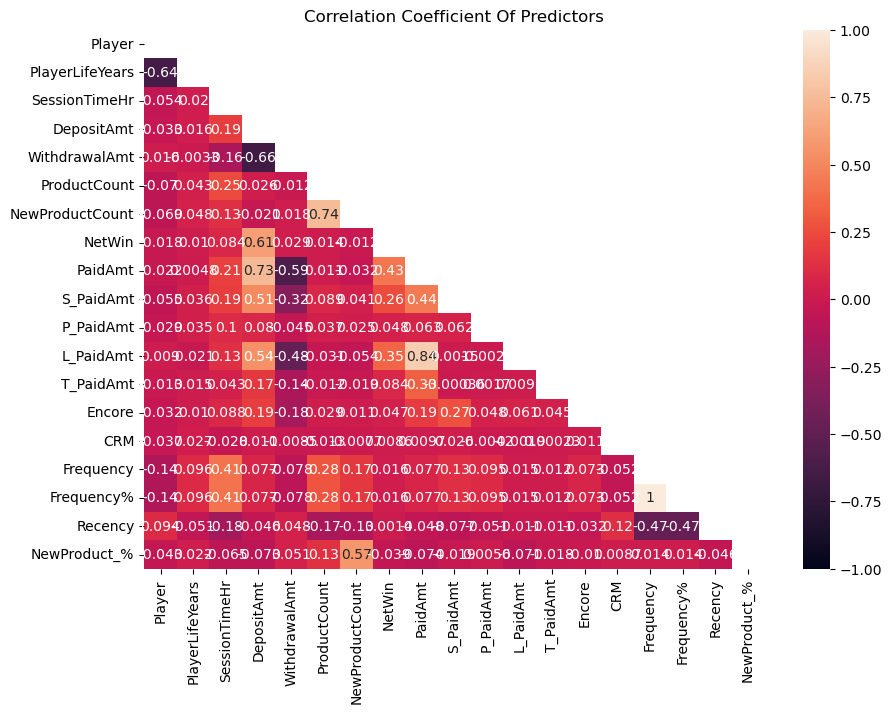

In [218]:
# set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(result_all_df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(result_all_df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [219]:
result_df = result_all_df.drop(columns=['Frequency%'])

In [220]:
result_all_df.index=result_all_df['Player']
result_all_df=result_all_df.drop(columns =['Player'])
result_all_df['WithdrawalAmt'] = result_all_df['WithdrawalAmt']*-1

In [221]:
result_df.index=result_df['Player']
#result_df = result_df[(result_df['Encore']  == 0)]
result_df=result_df.drop(columns =['Player'])
result_df['WithdrawalAmt'] = result_df['WithdrawalAmt']*-1
result_df['PaidAmt'][result_df['PaidAmt']<0]=0
result_df['S_PaidAmt'][result_df['S_PaidAmt']<0]=0
result_df['P_PaidAmt'][result_df['P_PaidAmt']<0]=0
result_df['L_PaidAmt'][result_df['L_PaidAmt']<0]=0
result_df['T_PaidAmt'][result_df['T_PaidAmt']<0]=0
result_df['CRM'][result_df['CRM']<0]=0
result_df

C:\Users\jverdugo\AppData\Local\Temp\ipykernel_27236\527302250.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jverdugo\AppData\Local\Temp\ipykernel_27236\527302250.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jverdugo\AppData\Local\Temp\ipykernel_27236\527302250.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jverdugo\AppData\Local\Temp\ipykernel_27236\527302250.py:8: SettingWithCopyWarning:



PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
Player                                                               
101            18.531507       1.212766   85.106383      77.914894   
103             2.643836       2.666667  333.333333     283.333333   
105            12.397260       0.500000   50.000000      50.000000   
133            14.284932       0.958333  211.458333     105.051250   
183            17.087671       2.405063  210.759494      60.126582   
...                  ...            ...         ...            ...   
7638070        15.517808       1.000000    6.250000      -0.000000   
7686443         8.298630       3.071429   19.285714      -0.000000   
7686987         6.408219       3.428571   71.428571      -0.000000   
7731570         8.884932       0.500000    2.500000       3.166667   
7731866         1.509589       2.363636   28.363636      -0.000000   

         ProductCount  NewProductCount      NetWin      PaidAmt    S_PaidAmt  \
Player                                                                         
101          1.085106         0.000000    5.787234  1386.297872     0.000000   
103          4.666667         0.000000   49.993333  1615.603333  1615.603333   
105          3.500000         0.000000   -0.005000   628.400000   628.400000   
133          3.541667         2.083333  103.294583  3021.340417  3005.477917   
183          4.240506         2.708861  230.306076  2725.759620  2453.701519   
...               ...              ...         ...          ...          ...   
7638070      1.000000         0.250000    6.940000    10.825000    10.825000   
7686443      2.428571         0.000000   19.182143   526.160714     0.000000   
7686987      2.000000         0.000000   66.071429  1779.571429     0.000000   
7731570      1.333333         0.333333   -2.100000    13.666667     0.666667   
7731866      6.090909         1.590909   27.829091    96.608182    73.427727   

          P_PaidAmt    L_PaidAmt  T_PaidAmt     Encore       CRM  Frequency  \
Player                                                                        
101        0.000000  1386.297872        0.0   0.000000  0.000000         47   
103        0.000000     0.000000        0.0   0.000000  0.000000          3   
105        0.000000     0.000000        0.0   0.000000  0.000000          2   
133       15.862500     0.000000        0.0  18.708333  0.000000         24   
183      226.153038    45.905063        0.0  14.898734  0.000000         79   
...             ...          ...        ...        ...       ...        ...   
7638070    0.000000     0.000000        0.0   0.000000  0.000000          4   
7686443    0.000000   526.160714        0.0   0.000000  0.000000         14   
7686987    0.000000  1779.571429        0.0   0.000000  0.000000          7   
7731570    0.000000    13.000000        0.0   1.666667  0.000000          6   
7731866   21.953182     1.227273        0.0   0.000000  0.431818         22   

         Recency  NewProduct_%  
Player                          
101           24      0.000000  
103          142      0.000000  
105          139      0.000000  
133            1      0.588235  
183           86      0.638806  
...          ...           ...  
7638070        4      0.250000  
7686443       82      0.000000  
7686987       51      0.000000  
7731570       21      0.250000  
7731866        6      0.261194  

[84283 rows x 17 columns]

In [222]:
result_df.isnull().any()

PlayerLifeYears    False
SessionTimeHr      False
DepositAmt         False
WithdrawalAmt      False
ProductCount       False
NewProductCount    False
NetWin             False
PaidAmt            False
S_PaidAmt          False
P_PaidAmt          False
L_PaidAmt          False
T_PaidAmt          False
Encore             False
CRM                False
Frequency          False
Recency            False
NewProduct_%       False
dtype: bool

In [223]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84283 entries, 101 to 7731866
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PlayerLifeYears  84283 non-null  float64
 1   SessionTimeHr    84283 non-null  float64
 2   DepositAmt       84283 non-null  float64
 3   WithdrawalAmt    84283 non-null  float64
 4   ProductCount     84283 non-null  float64
 5   NewProductCount  84283 non-null  float64
 6   NetWin           84283 non-null  float64
 7   PaidAmt          84283 non-null  float64
 8   S_PaidAmt        84283 non-null  float64
 9   P_PaidAmt        84283 non-null  float64
 10  L_PaidAmt        84283 non-null  float64
 11  T_PaidAmt        84283 non-null  float64
 12  Encore           84283 non-null  float64
 13  CRM              84283 non-null  float64
 14  Frequency        84283 non-null  int64  
 15  Recency          84283 non-null  int64  
 16  NewProduct_%     84283 non-null  float64
dtypes: float

PlayerLifeYears


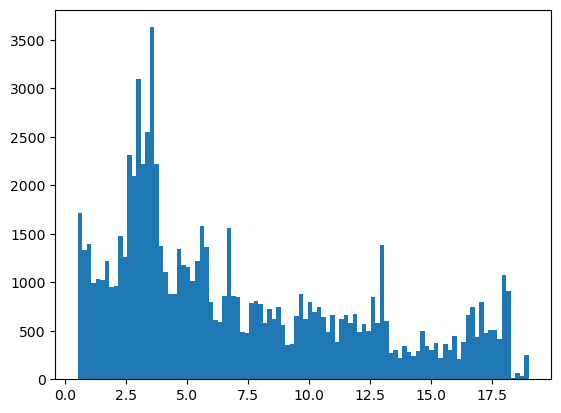

SessionTimeHr


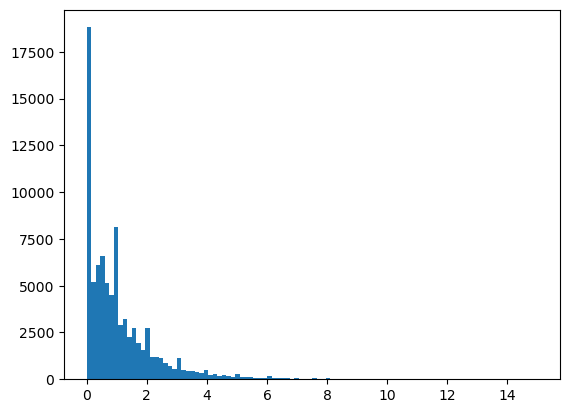

DepositAmt


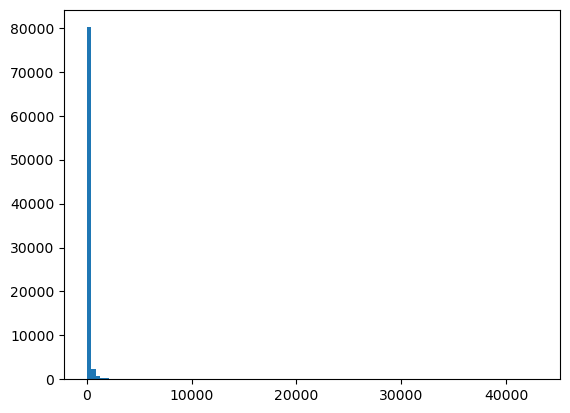

WithdrawalAmt


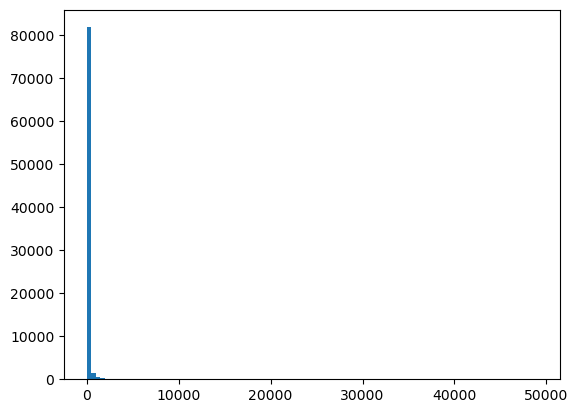

ProductCount


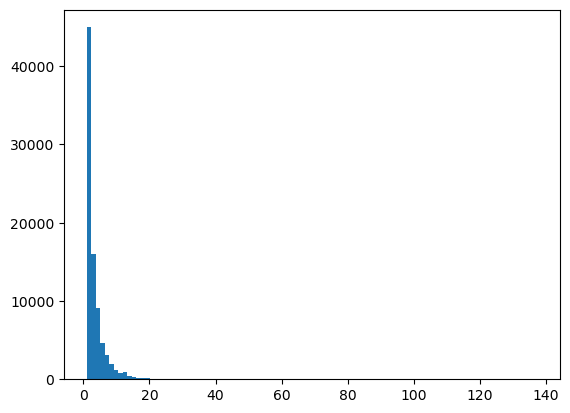

NewProductCount


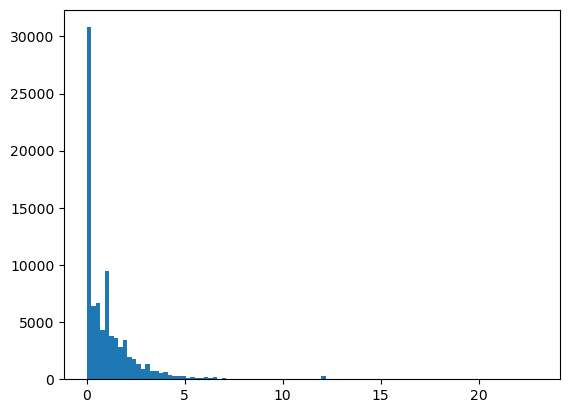

NetWin


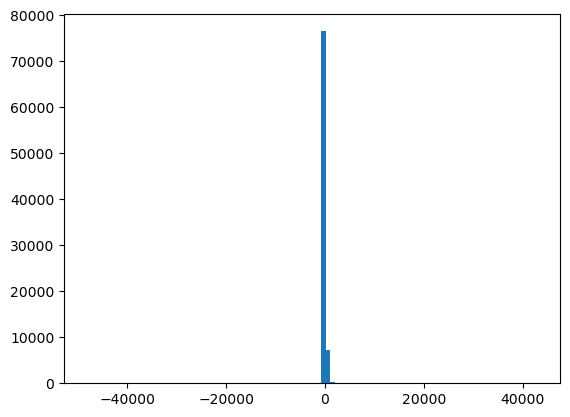

PaidAmt


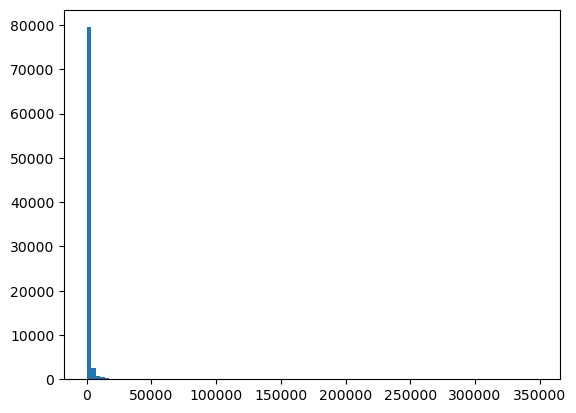

S_PaidAmt


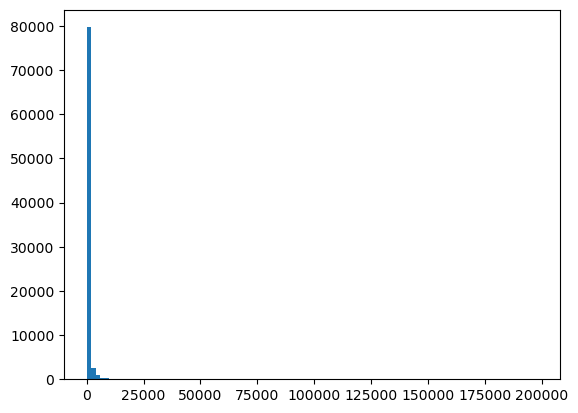

P_PaidAmt


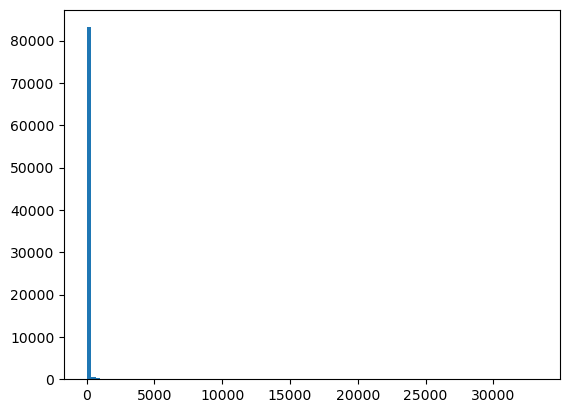

L_PaidAmt


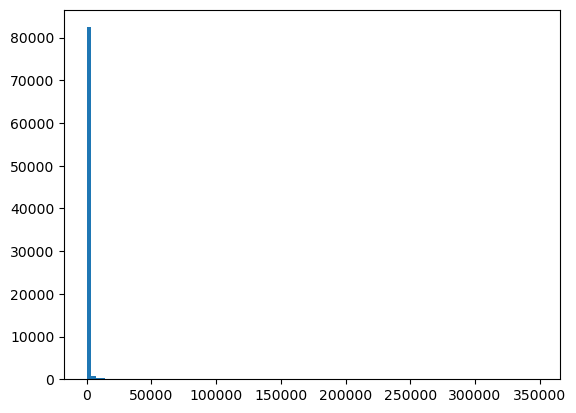

T_PaidAmt


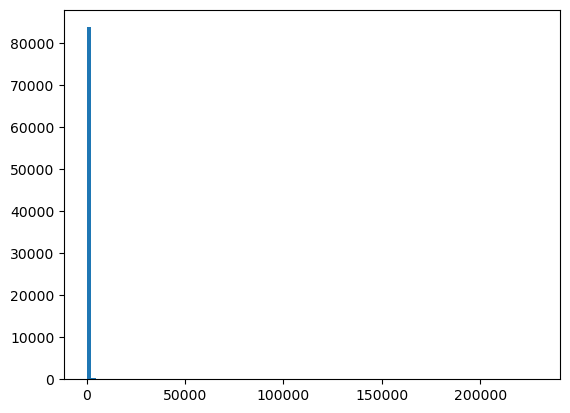

Encore


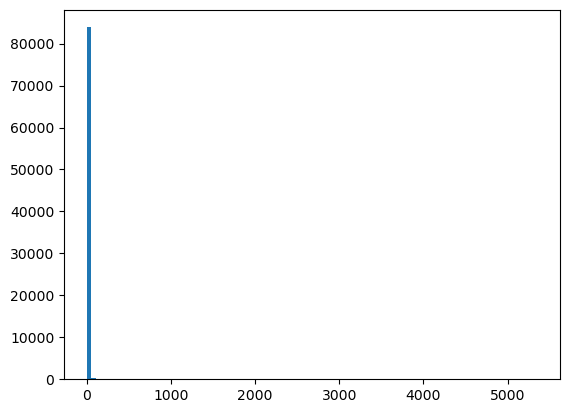

CRM


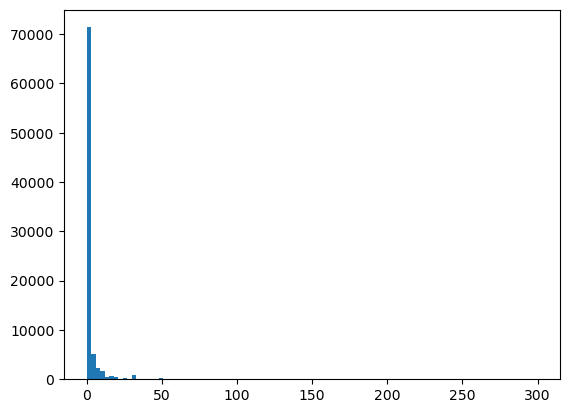

Frequency


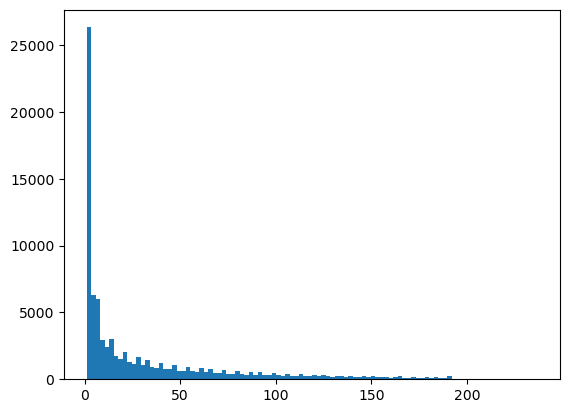

Recency


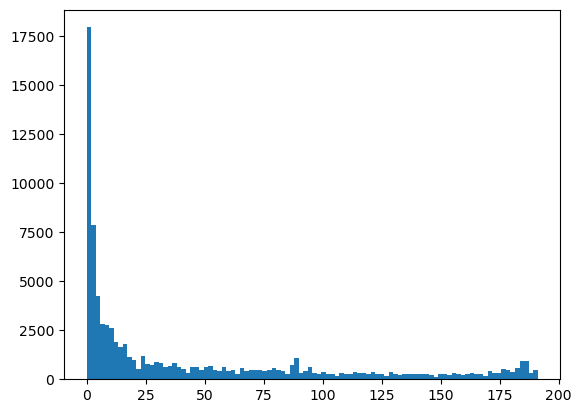

NewProduct_%


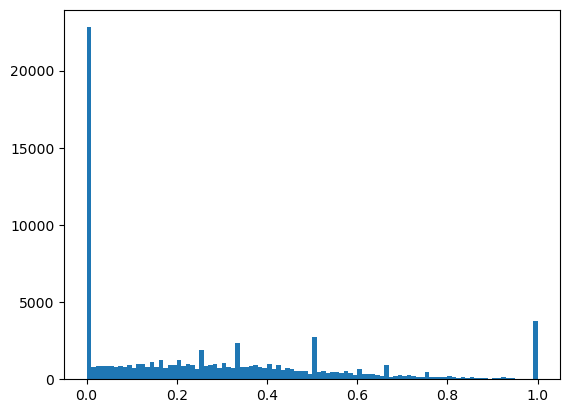

In [224]:
for column in result_df.columns:
    print(column)
    plt.hist(result_df[column],bins=100)
    plt.show()

In [225]:
df_transformed = np.log(result_df+1)

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning:

divide by zero encountered in log

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning:

invalid value encountered in log



In [226]:
df_transformed = df_transformed.drop(columns=['NetWin'])
# df_transformed = df_transformed.drop(columns=['Encore'])
# df_transformed = df_transformed.drop(columns=['CRM'])
df_transformed

PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
Player                                                               
101             2.972029       0.794243    4.455584       4.368370   
103             1.293037       1.299283    5.812138       5.650147   
105             2.595050       0.405465    3.931826       3.931826   
133             2.726867       0.672094    5.358746       4.663922   
183             2.895231       1.225264    5.355451       4.112947   
...                  ...            ...         ...            ...   
7638070         2.804439       0.693147    1.981001       0.000000   
7686443         2.229867       1.403994    3.009917       0.000000   
7686987         2.002590       1.488077    4.282601       0.000000   
7731570         2.291012       0.405465    1.252763       1.427116   
7731866         0.920119       1.213023    3.379757       0.000000   

         ProductCount  NewProductCount   PaidAmt  S_PaidAmt  P_PaidAmt  \
Player                                                                   
101          0.734820         0.000000  7.235113   0.000000   0.000000   
103          1.734601         0.000000  7.388083   7.388083   0.000000   
105          1.504077         0.000000  6.444767   6.444767   0.000000   
133          1.513294         1.126011  8.013787   8.008525   2.825092   
183          1.656418         1.310725  7.910869   7.805760   5.425624   
...               ...              ...       ...        ...        ...   
7638070      0.693147         0.223144  2.470216   2.470216   0.000000   
7686443      1.232144         0.000000  6.267505   0.000000   0.000000   
7686987      1.098612         0.000000  7.484690   0.000000   0.000000   
7731570      0.847298         0.287682  2.685577   0.510826   0.000000   
7731866      1.958814         0.952009  4.580961   4.309829   3.133457   

         L_PaidAmt  T_PaidAmt    Encore       CRM  Frequency   Recency  \
Player                                                                   
101       7.235113        0.0  0.000000  0.000000   3.871201  3.218876   
103       0.000000        0.0  0.000000  0.000000   1.386294  4.962845   
105       0.000000        0.0  0.000000  0.000000   1.098612  4.941642   
133       0.000000        0.0  2.981042  0.000000   3.218876  0.693147   
183       3.848126        0.0  2.766239  0.000000   4.382027  4.465908   
...            ...        ...       ...       ...        ...       ...   
7638070   0.000000        0.0  0.000000  0.000000   1.609438  1.609438   
7686443   6.267505        0.0  0.000000  0.000000   2.708050  4.418841   
7686987   7.484690        0.0  0.000000  0.000000   2.079442  3.951244   
7731570   2.639057        0.0  0.980829  0.000000   1.945910  3.091042   
7731866   0.800778        0.0  0.000000  0.358945   3.135494  1.945910   

         NewProduct_%  
Player                 
101          0.000000  
103          0.000000  
105          0.000000  
133          0.462624  
183          0.493968  
...               ...  
7638070      0.223144  
7686443      0.000000  
7686987      0.000000  
7731570      0.223144  
7731866      0.232059  

[84283 rows x 16 columns]

PlayerLifeYears


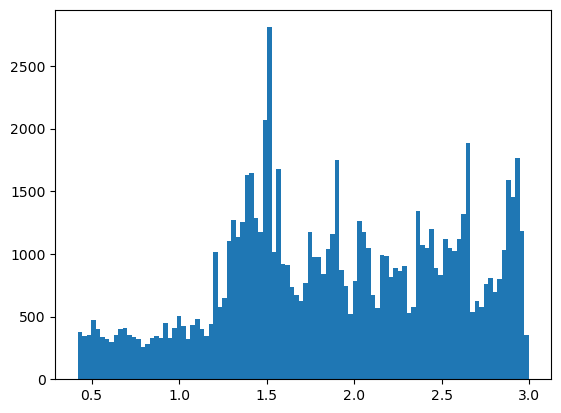

SessionTimeHr


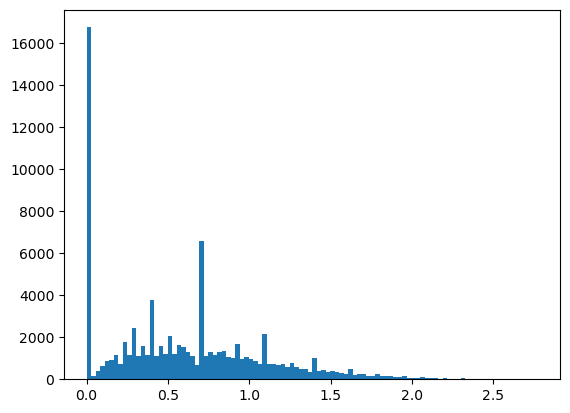

DepositAmt


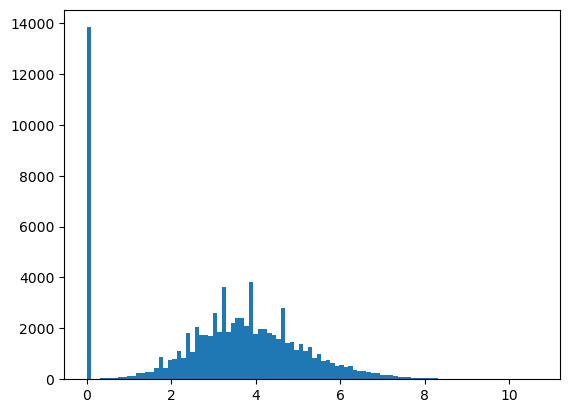

WithdrawalAmt


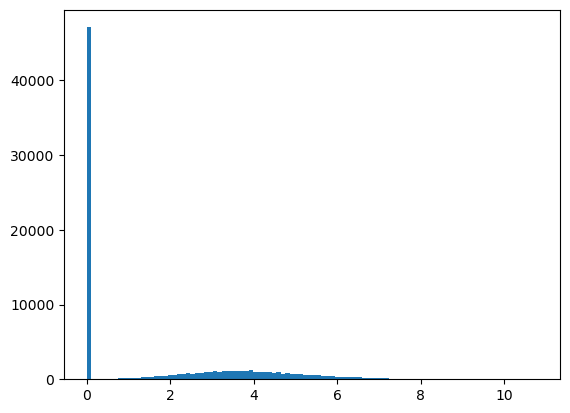

ProductCount


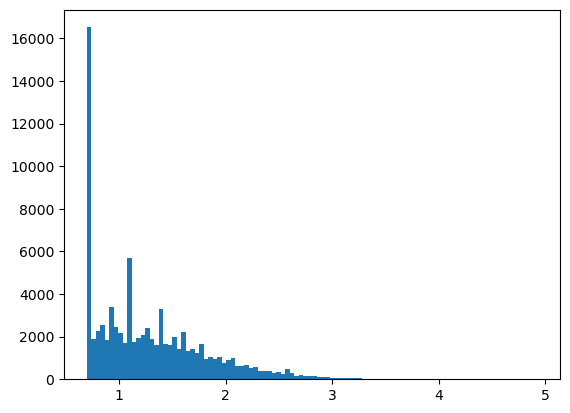

NewProductCount


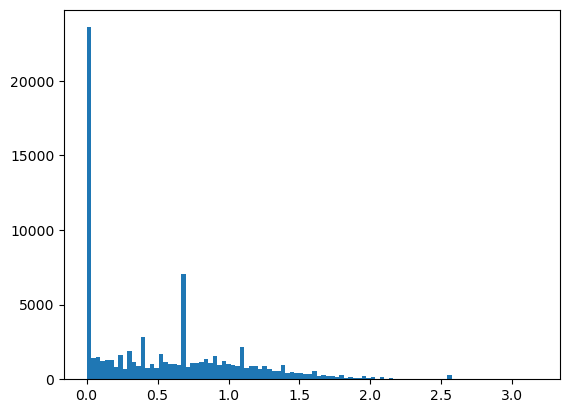

PaidAmt


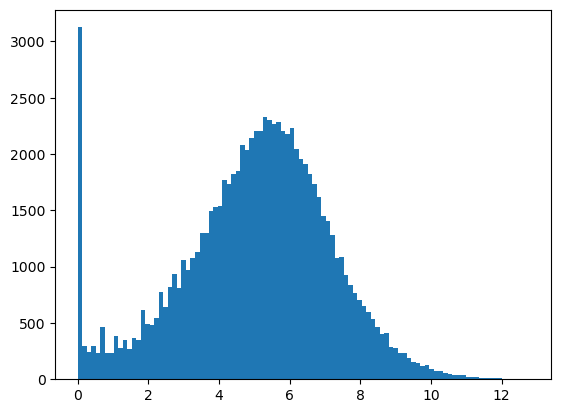

S_PaidAmt


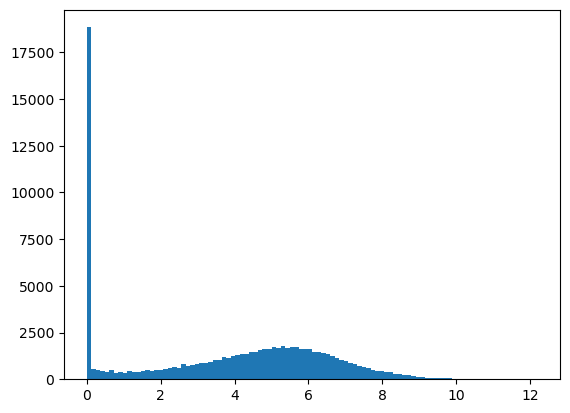

P_PaidAmt


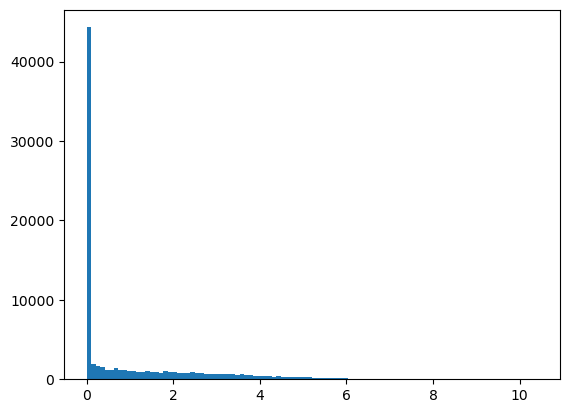

L_PaidAmt


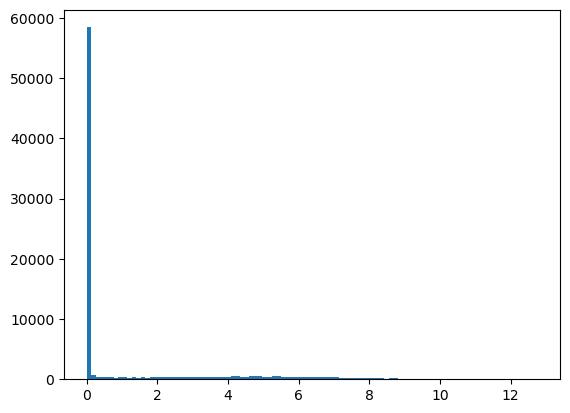

T_PaidAmt


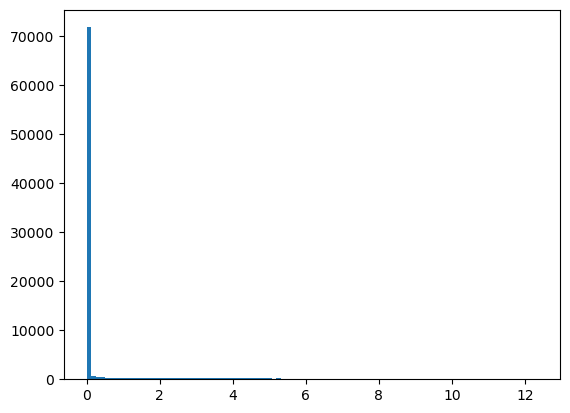

Encore


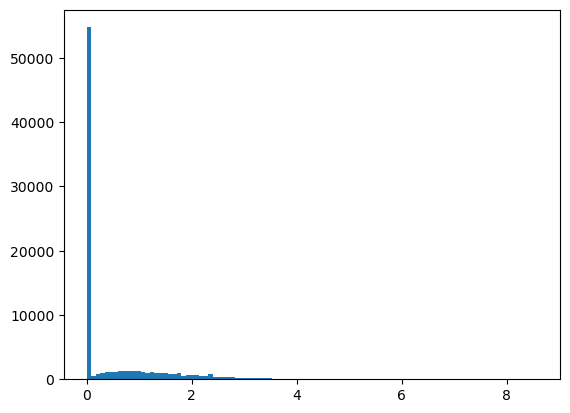

CRM


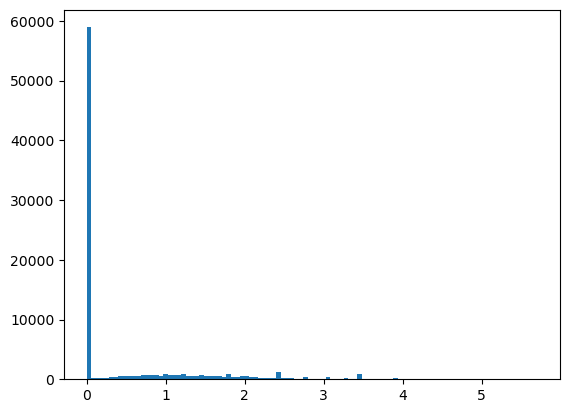

Frequency


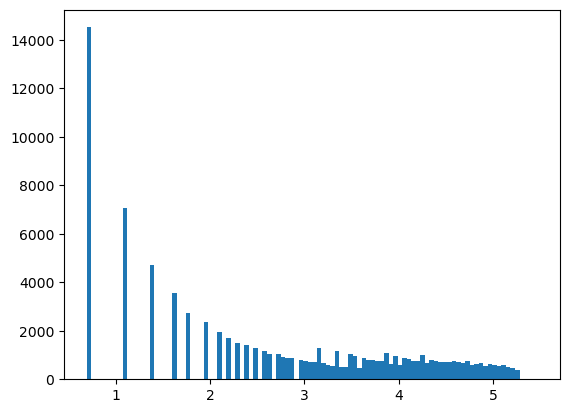

Recency


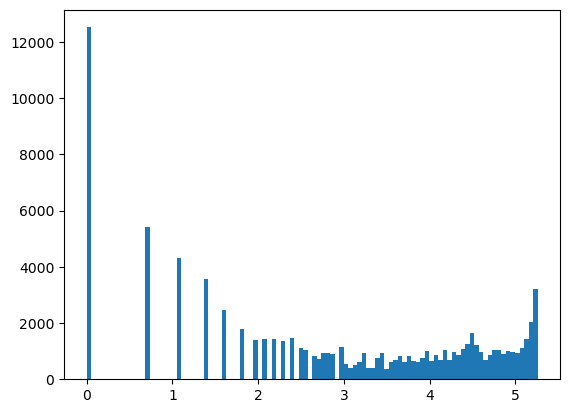

NewProduct_%


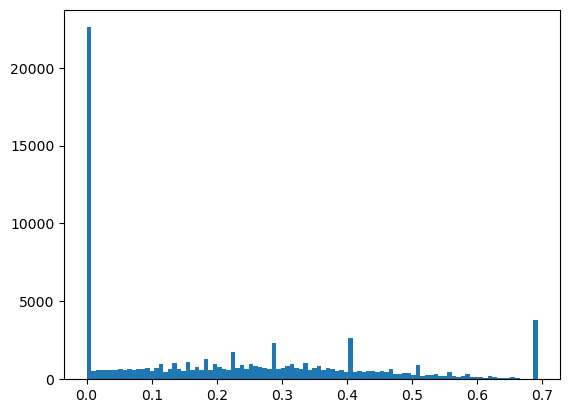

In [227]:
for column in df_transformed.columns:
    print(column)
    plt.hist(df_transformed[column], bins = 100)
    plt.show()

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Tools
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
# Look at a dendogram for hierarchical 
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [229]:
df_scaled = df_transformed.copy()

In [230]:
# Extract the columns you want to scale
columns_to_scale = ['PlayerLifeYears','SessionTimeHr', 'DepositAmt', 'WithdrawalAmt', 'ProductCount', 'NewProductCount', 'NewProduct_%','PaidAmt', 'S_PaidAmt', 'P_PaidAmt', 'L_PaidAmt', 'T_PaidAmt', 'Encore', 'CRM', 'Recency', 'Frequency']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the columns to scale
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

In [231]:
df_scaled

PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
Player                                                               
101             1.635726       0.380228    0.648312       1.234763   
103            -0.917137       1.399868    1.377317       1.828673   
105             1.062540      -0.404688    0.366848       1.032491   
133             1.262964       0.133616    1.133666       1.371707   
183             1.518956       1.250428    1.131896       1.116413   
...                  ...            ...         ...            ...   
7638070         1.380910       0.176122   -0.681513      -0.789317   
7686443         0.507288       1.611272   -0.128580      -0.789317   
7686987         0.161720       1.781030    0.555352      -0.789317   
7731570         0.600257      -0.404688   -1.072864      -0.128064   
7731866        -1.484149       1.225714    0.070169      -0.789317   

         ProductCount  NewProductCount   PaidAmt  S_PaidAmt  P_PaidAmt  \
Player                                                                   
101         -1.008230        -1.037663  1.033917  -1.402328  -0.665821   
103          0.816019        -1.037663  1.105274   1.359815  -0.665821   
105          0.395395        -1.037663  0.665234   1.007143  -0.665821   
133          0.412212         1.054222  1.397154   1.591777   1.139834   
183          0.673363         1.397380  1.349145   1.515970   2.801962   
...               ...              ...       ...        ...        ...   
7638070     -1.084268        -0.623110 -1.188826  -0.478802  -0.665821   
7686443     -0.100789        -1.037663  0.582544  -1.402328  -0.665821   
7686987     -0.344436        -1.037663  1.150340  -1.402328  -0.665821   
7731570     -0.802997        -0.503212 -1.088363  -1.211348  -0.665821   
7731866      1.225128         0.730963 -0.204199   0.208965   1.336925   

         L_PaidAmt  T_PaidAmt    Encore       CRM  Frequency   Recency  \
Player                                                                   
101       2.402010  -0.328137 -0.571819 -0.533646   0.908445  0.286635   
103      -0.548047  -0.328137 -0.571819 -0.533646  -0.833378  1.277500   
105      -0.548047  -0.328137 -0.571819 -0.533646  -1.035032  1.265454   
133      -0.548047  -0.328137  2.862550 -0.533646   0.451191 -1.148400   
183       1.020994  -0.328137  2.615083 -0.533646   1.266514  0.995157   
...            ...        ...       ...       ...        ...       ...   
7638070  -0.548047  -0.328137 -0.571819 -0.533646  -0.676963 -0.627794   
7686443   2.007476  -0.328137 -0.571819 -0.533646   0.093122  0.968415   
7686987   2.503773  -0.328137 -0.571819 -0.533646  -0.347508  0.702742   
7731570   0.528007  -0.328137  0.558165 -0.533646  -0.441109  0.214004   
7731866  -0.221536  -0.328137 -0.571819 -0.130626   0.392744 -0.436622   

         NewProduct_%  
Player                 
101         -1.090886  
103         -1.090886  
105         -1.090886  
133          1.166916  
183          1.319891  
...               ...  
7638070     -0.001849  
7686443     -1.090886  
7686987     -1.090886  
7731570     -0.001849  
7731866      0.041662  

[84283 rows x 16 columns]

In [232]:
model  = PCA(n_components=3)
pca_transformed  = model.fit_transform(df_scaled)

In [233]:
df_pca = pd.DataFrame(pca_transformed)

In [234]:
df_pca

0         1         2
0     -0.066674  3.321591 -0.120647
1      1.128710  1.612609 -1.137076
2     -0.336621  0.882563  0.039235
3      3.904192 -0.718435  0.570400
4      4.253439 -0.579343 -0.548738
...         ...       ...       ...
84278 -1.763479 -0.211327  1.066633
84279 -1.024485  2.288505 -0.835396
84280 -0.720701  2.916079 -1.394145
84281 -1.844987  0.287664  0.459260
84282  0.981337 -1.060570 -0.997427

[84283 rows x 3 columns]

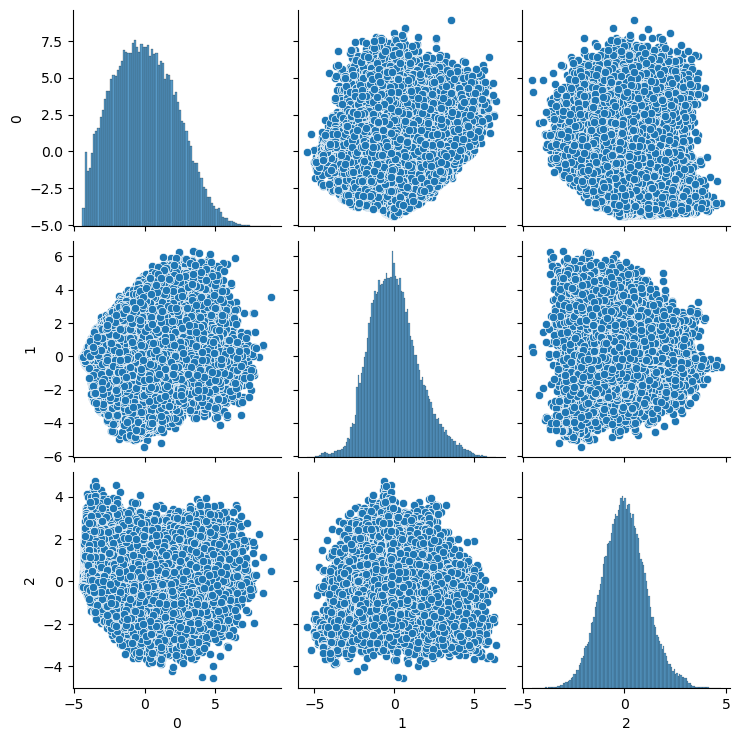

In [235]:
sns.pairplot(df_pca)

In [42]:
clusters = []
inertia = []
sil_score = []

for k in range(2,17): 
    kmeans_model = KMeans(n_clusters=k)
    labels = kmeans_model.fit_predict(df_scaled)
    inertia.append(kmeans_model.inertia_)
    clusters.append(k)
    sil_score.append(silhouette_score(df_scaled, labels))

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\si

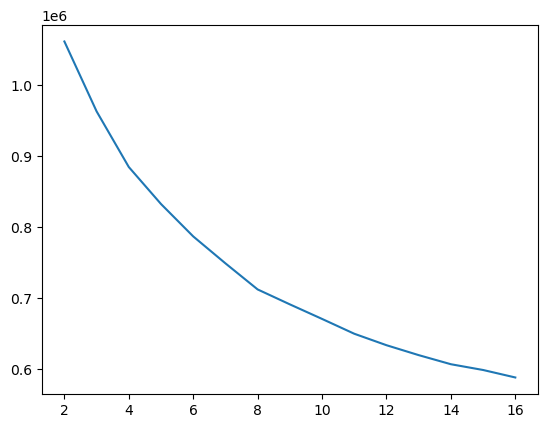

In [43]:
#inertia  plot
plt.plot(clusters, inertia)

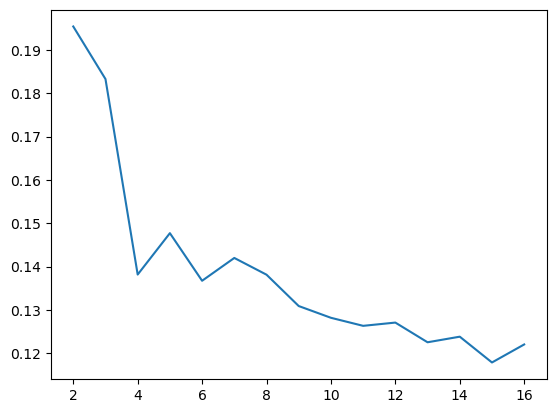

In [44]:
# sil score
plt.plot(clusters, sil_score)

In [170]:
kmeans_model = KMeans(7)
kmeans_labels = kmeans_model.fit_predict(df_scaled)

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [236]:
df_kmeans = result_all_df.copy()
df_kmeans['kmeans_labels'] = kmeans_labels

In [260]:
df_kmeans_sum = sum_all_df.copy()
df_kmeans_sum['kmeans_labels'] = kmeans_labels

In [237]:
df_pca_kmeans = df_pca.copy()

In [238]:
len(kmeans_labels)

84283

In [239]:
df_pca_kmeans['kmeans_labels'] = kmeans_labels

In [240]:
df_pca_kmeans.head()

0         1         2  kmeans_labels
0 -0.066674  3.321591 -0.120647              2
1  1.128710  1.612609 -1.137076              6
2 -0.336621  0.882563  0.039235              6
3  3.904192 -0.718435  0.570400              1
4  4.253439 -0.579343 -0.548738              1

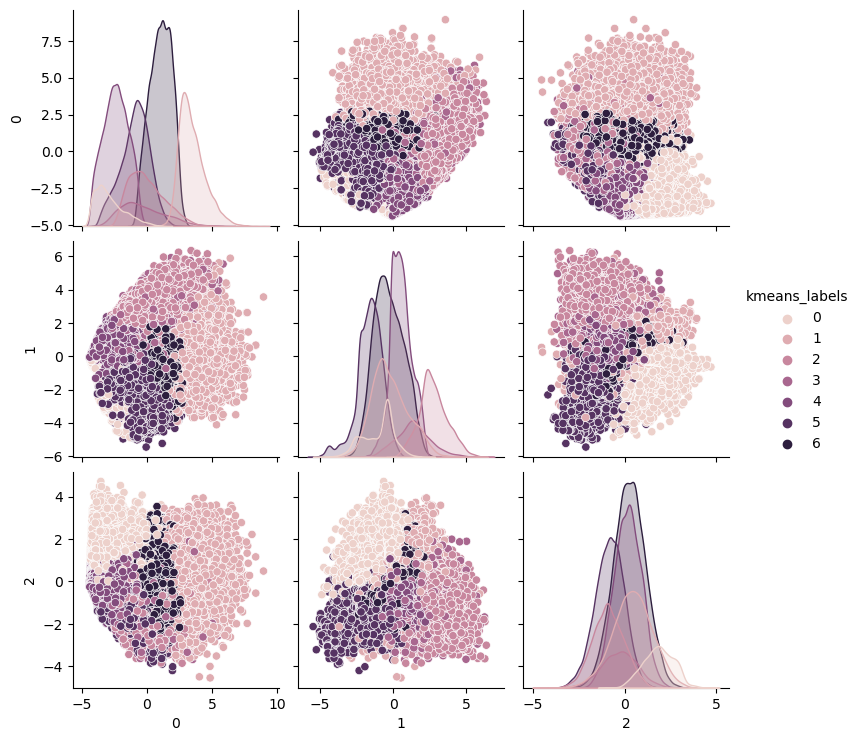

In [241]:
sns.pairplot(df_pca_kmeans, hue = 'kmeans_labels')

In [242]:
df_kmeans.head()

PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
Player                                                              
101           18.531507       1.212766   85.106383      77.914894   
103            2.643836       2.666667  333.333333     283.333333   
105           12.397260       0.500000   50.000000      50.000000   
133           14.284932       0.958333  211.458333     105.051250   
183           17.087671       2.405063  210.759494      60.126582   

        ProductCount  NewProductCount      NetWin      PaidAmt    S_PaidAmt  \
Player                                                                        
101         1.085106         0.000000    5.787234  1386.297872     0.000000   
103         4.666667         0.000000   49.993333  1615.603333  1615.603333   
105         3.500000         0.000000   -0.005000   628.400000   628.400000   
133         3.541667         2.083333  103.294583  3021.340417  3005.477917   
183         4.240506         2.708861  230.306076  2725.759620  2453.701519   

         P_PaidAmt    L_PaidAmt  T_PaidAmt     Encore  CRM  Frequency  \
Player                                                                  
101       0.000000  1386.297872        0.0   0.000000  0.0         47   
103       0.000000     0.000000        0.0   0.000000  0.0          3   
105       0.000000     0.000000        0.0   0.000000  0.0          2   
133      15.862500     0.000000        0.0  18.708333  0.0         24   
183     226.153038    45.905063        0.0  14.898734  0.0         79   

        Frequency%  Recency  NewProduct_%  kmeans_labels  
Player                                                    
101       0.244792       24      0.000000              2  
103       0.015625      142      0.000000              6  
105       0.010417      139      0.000000              6  
133       0.125000        1      0.588235              1  
183       0.411458       86      0.638806              1

In [278]:
temp_df = df_kmeans.groupby('kmeans_labels').mean().reset_index()

In [279]:
temp_df

kmeans_labels  PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
0              0         8.016212       0.418829    8.186981       5.073814   
1              1         7.989019       2.323516  278.264783     223.896433   
2              2         5.788982       1.644436  318.307261     268.778565   
3              3         8.214094       1.235669  151.673050     108.334575   
4              4         6.716174       0.462680   21.135453       2.710105   
5              5         6.538977       0.595715   30.269581       5.010981   
6              6         7.561338       1.119439   74.556888      34.853726   

   ProductCount  NewProductCount      NetWin      PaidAmt    S_PaidAmt  \
0      2.049465         0.592662    7.153064    40.708318    32.772120   
1      6.693374         2.105032  106.480751  2682.461111  2325.156394   
2      1.812643         0.158599  136.161307  3976.650363    95.707520   
3      2.337736         0.445984   73.982073  2122.899298   202.435288   
4      1.472587         0.082199   16.784317    84.491948    47.433524   
5      3.603422         2.023573   22.551115   119.297320   102.509160   
6      3.720247         1.141146   39.763549   521.424780   492.698547   

    P_PaidAmt    L_PaidAmt    T_PaidAmt     Encore        CRM  Frequency  \
0    1.319815     5.201255     1.415127   0.418504  25.832647   2.557758   
1  106.847596   238.311526    12.145596  10.390609   2.787980  83.435985   
2    2.021933  3877.616755     1.304155   1.381925   1.052562  26.600683   
3   11.640753   320.998500  1587.824758   1.880765   0.997011  23.294038   
4    4.805449    30.855617     1.397359   0.508316   0.137681   5.507180   
5    8.289693     7.677072     0.821396   0.603538   0.491291   6.271086   
6   19.440460     8.691693     0.594080   1.043725   0.949306  48.162274   

   Frequency%     Recency  NewProduct_%  
0    0.013322  119.202552      0.268867  
1    0.434562   11.232759      0.323938  
2    0.138545   41.280028      0.067656  
3    0.121323   45.831557      0.164656  
4    0.028683   78.265132      0.048837  
5    0.032662   68.814740      0.620562  
6    0.250845   13.994569      0.301049

In [283]:
nw_sum = df_kmeans_sum.groupby('kmeans_labels')['NetWin'].sum().reset_index()
nw_sum

kmeans_labels       NetWin
0              0    104244.73
1              1  96399765.14
2              2  25378883.73
3              3   9534732.10
4              4    872020.99
5              5   1446228.63
6              6  26638486.42

In [284]:
sum(nw_sum['NetWin'])

160374361.74

In [285]:
crm_sum = df_kmeans_sum.groupby('kmeans_labels')['CRM','NetWin'].sum().reset_index()
crm_sum

C:\Users\jverdugo\AppData\Local\Temp\ipykernel_27236\3603334816.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



kmeans_labels         CRM       NetWin
0              0   273493.38    104244.73
1              1  2734417.61  96399765.14
2              2   316833.94  25378883.73
3              3    98263.42   9534732.10
4              4    18587.66    872020.99
5              5    51039.48   1446228.63
6              6   894456.57  26638486.42

In [286]:
sum(crm_sum['CRM'])

4387092.06

In [287]:
# Count the occurrences of each segment and store it in a DataFrame
segment_counts = df_kmeans['kmeans_labels'].value_counts().reset_index()
segment_counts.columns = ['kmeans_labels', 'PlayerCount']

# for CRM sum graph
crm_sum = df_kmeans_sum.groupby('kmeans_labels')['CRM'].sum().reset_index()
crm_sum = crm_sum.rename(columns={'CRM':'CRM_sum'})
nw_sum = df_kmeans_sum.groupby('kmeans_labels')['NetWin'].sum().reset_index()
nw_sum = nw_sum.rename(columns={'NetWin':'NetWin_sum'})

temp_df = df_kmeans.groupby('kmeans_labels').mean().reset_index()
temp_df = pd.merge(temp_df,crm_sum,on='kmeans_labels',how='left')
temp_df = pd.merge(temp_df,nw_sum,on='kmeans_labels',how='left')

# Sort the DataFrame by "PaidAmt" in descending order
temp_df= temp_df.sort_values(by='PaidAmt', ascending=False)

# Merge the player count DataFrame with temp_df
temp_df = temp_df.merge(segment_counts, on='kmeans_labels', how='left')

# Reorganize the "kmeans_labels" based on the new order
temp_df['kmeans_labels'] = range(len(temp_df))
temp_df

kmeans_labels  PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
0              0         5.788982       1.644436  318.307261     268.778565   
1              1         7.989019       2.323516  278.264783     223.896433   
2              2         8.214094       1.235669  151.673050     108.334575   
3              3         7.561338       1.119439   74.556888      34.853726   
4              4         6.538977       0.595715   30.269581       5.010981   
5              5         6.716174       0.462680   21.135453       2.710105   
6              6         8.016212       0.418829    8.186981       5.073814   

   ProductCount  NewProductCount      NetWin      PaidAmt    S_PaidAmt  ...  \
0      1.812643         0.158599  136.161307  3976.650363    95.707520  ...   
1      6.693374         2.105032  106.480751  2682.461111  2325.156394  ...   
2      2.337736         0.445984   73.982073  2122.899298   202.435288  ...   
3      3.720247         1.141146   39.763549   521.424780   492.698547  ...   
4      3.603422         2.023573   22.551115   119.297320   102.509160  ...   
5      1.472587         0.082199   16.784317    84.491948    47.433524  ...   
6      2.049465         0.592662    7.153064    40.708318    32.772120  ...   

     T_PaidAmt     Encore        CRM  Frequency  Frequency%     Recency  \
0     1.304155   1.381925   1.052562  26.600683    0.138545   41.280028   
1    12.145596  10.390609   2.787980  83.435985    0.434562   11.232759   
2  1587.824758   1.880765   0.997011  23.294038    0.121323   45.831557   
3     0.594080   1.043725   0.949306  48.162274    0.250845   13.994569   
4     0.821396   0.603538   0.491291   6.271086    0.032662   68.814740   
5     1.397359   0.508316   0.137681   5.507180    0.028683   78.265132   
6     1.415127   0.418504  25.832647   2.557758    0.013322  119.202552   

   NewProduct_%     CRM_sum   NetWin_sum  PlayerCount  
0      0.067656   316833.94  25378883.73         8492  
1      0.323938  2734417.61  96399765.14        12833  
2      0.164656    98263.42   9534732.10         4411  
3      0.301049   894456.57  26638486.42        22462  
4      0.620562    51039.48   1446228.63        14844  
5      0.048837    18587.66    872020.99        16852  
6      0.268867   273493.38    104244.73         4389  

[7 rows x 22 columns]

In [288]:
import plotly.express as px

# Exclude 'kmeans_labels' from the list of metrics
metrics = temp_df.columns[1:]

# Create separate bar plots for each metric with gradients of blues
for metric in metrics:
    fig = px.bar(temp_df, x='kmeans_labels', y=metric,
                 labels={'kmeans_labels': 'Segment', metric: f'Average per day {metric}'},
                 title=f'2024 {metric}')

    # Define a custom color scale ranging from dark to light blue
    num_segments = len(temp_df['kmeans_labels'].unique())
    colors = px.colors.sequential.Inferno[::-1]  # Reverse the default Blues color scale
   
    # Assign colors to segments based on their order
    segment_colors = {label: colors[i % len(colors)] for i, label in enumerate(temp_df['kmeans_labels'].unique())}
   
    fig.update_traces(marker=dict(
       color=[segment_colors[label] for label in temp_df['kmeans_labels']]
    ))
    # Update the y-axis title for the 'PlayerCount' column
    if metric == 'PlayerCount':
        fig.update_yaxes(title=f'Sum per day {metric}', tickfont=dict(size=20))
    elif metric == 'CRM_sum':
        fig.update_yaxes(title=f'Full-period {metric}', tickfont=dict(size=20))
    elif metric == 'NetWin_sum':
        fig.update_yaxes(title=f'Full-period {metric}', tickfont=dict(size=20))
    else:
        fig.update_yaxes(title=f'Average per day {metric}', tickfont=dict(size=20))
    # Set the background color of the entire plot
    fig.update_layout(plot_bgcolor='lightgray', font=dict(size=20))
     # Remove decimals from x-axis labels
    fig.update_xaxes(type='category', categoryorder='category ascending', tickfont=dict(size=20))
    fig.show()

In [59]:
result_sample_df = result_df.copy()

In [60]:
random_seed = 1
result_sample_df = result_sample_df.sample(frac=0.3, random_state=random_seed)
result_sample_df

PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
Player                                                               
7543141         0.531507       0.612903   54.758065      36.129032   
831631         10.498630       5.564516  268.279570      51.075269   
188583         12.920548       1.750000   44.000000      18.750000   
4799223         5.271233       2.605769  265.519231     358.846154   
1394807         0.893151       0.000000    8.333333      -0.000000   
...                  ...            ...         ...            ...   
1507554        15.934247       0.000000    6.000000      -0.000000   
1589778         6.008219       0.000000    0.000000      -0.000000   
766775         12.282192       0.300000   45.000000      -0.000000   
3656633         1.394521       0.200000   80.000000      -0.000000   
1294005         8.060274       0.000000    0.000000      -0.000000   

         ProductCount  NewProductCount      NetWin      PaidAmt    S_PaidAmt  \
Player                                                                         
7543141      3.532258         0.564516   19.078710   211.804032   211.420161   
831631      12.172043         3.548387  190.924301  3459.139946  3110.191290   
188583       3.250000         0.750000   33.252375   584.723500   582.111000   
4799223      6.355769         1.403846  112.587115  1801.471346   562.366058   
1394807      1.000000         0.000000    1.333333     2.666667     0.000000   
...               ...              ...         ...          ...          ...   
1507554      1.000000         0.000000    1.425000     1.850000     0.000000   
1589778      1.000000         0.000000    6.000000    27.750000     0.000000   
766775       1.500000         0.900000    4.545000    22.150000    21.150000   
3656633      1.400000         0.000000   76.300000   589.200000     0.000000   
1294005      7.000000         0.000000   12.330000    53.450000    38.550000   

          P_PaidAmt    L_PaidAmt  T_PaidAmt     Encore       CRM  Frequency  \
Player                                                                        
7543141    0.383871     0.000000   0.000000   1.096774  0.000000         62   
831631   348.760484     0.161290   0.026882  14.403226  0.000000        186   
188583     2.612500     0.000000   0.000000   2.915000  0.000000         80   
4799223    0.755769  1238.349519   0.000000   3.644808  3.365385        104   
1394807    0.000000     2.666667   0.000000   0.000000  0.000000          6   
...             ...          ...        ...        ...       ...        ...   
1507554    0.000000     0.000000   1.850000   0.000000  5.000000          2   
1589778    0.000000    27.750000   0.000000   0.000000  0.000000          1   
766775     1.000000     0.000000   0.000000   0.000000  0.000000         10   
3656633    0.000000   589.200000   0.000000   0.000000  0.000000          5   
1294005   14.900000     0.000000   0.000000   0.000000  0.000000          1   

         Recency  NewProduct_%  
Player                          
7543141       15      0.159817  
831631         0      0.291519  
188583         0      0.230769  
4799223        6      0.220877  
1394807       87      0.000000  
...          ...           ...  
1507554       87      0.000000  
1589778      125      0.000000  
766775         1      0.600000  
3656633       57      0.000000  
1294005       49      0.000000  

[25285 rows x 17 columns]

PlayerLifeYears


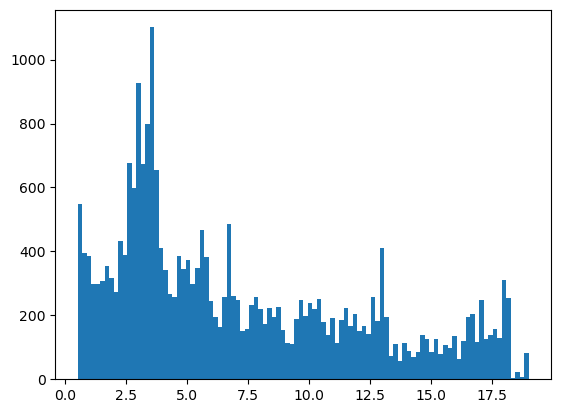

SessionTimeHr


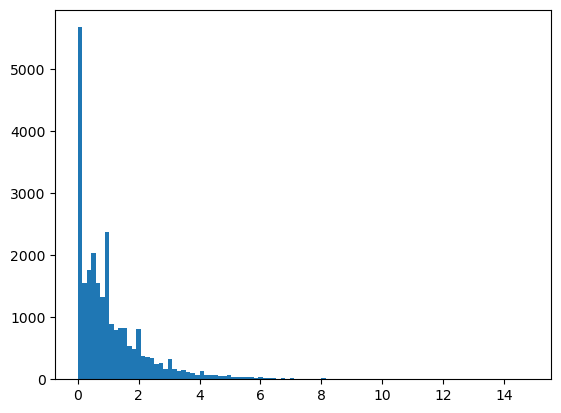

DepositAmt


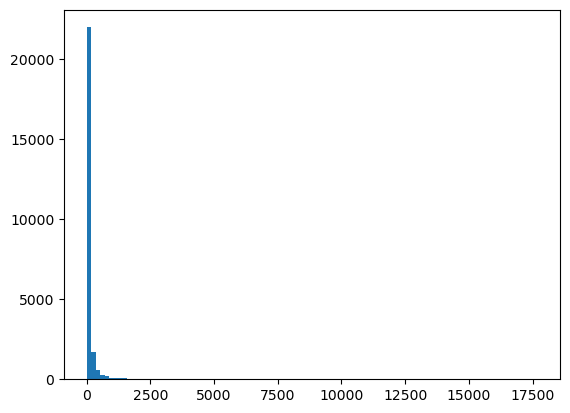

WithdrawalAmt


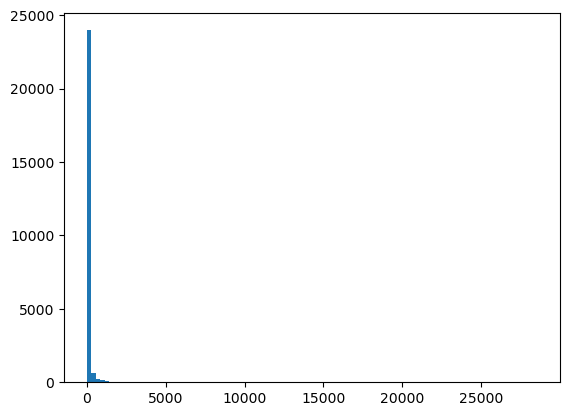

ProductCount


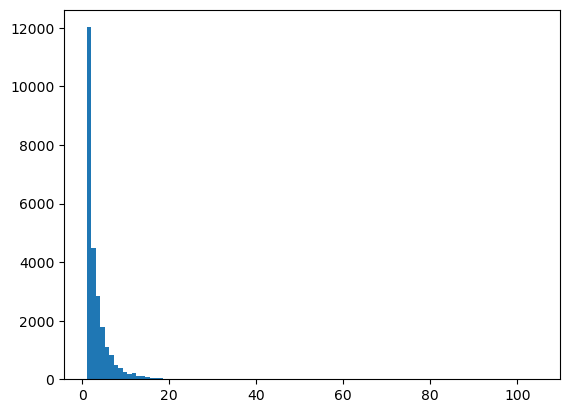

NewProductCount


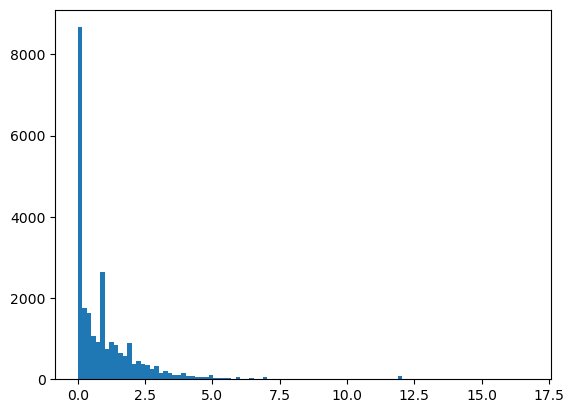

NetWin


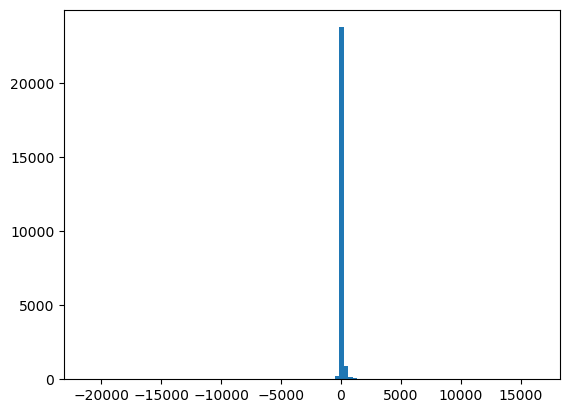

PaidAmt


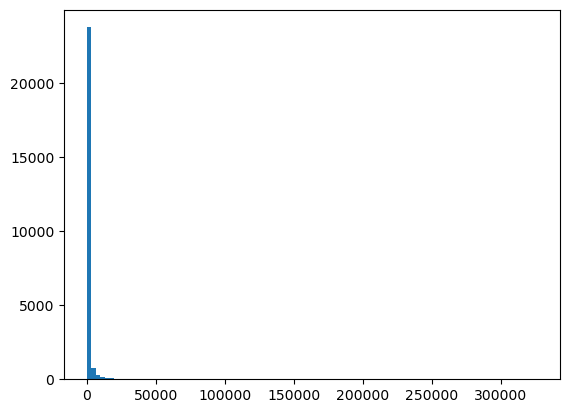

S_PaidAmt


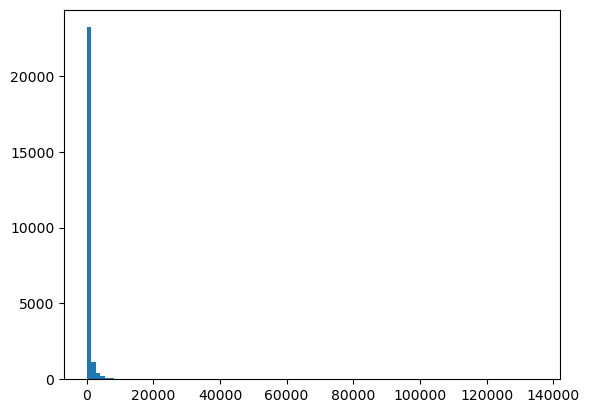

P_PaidAmt


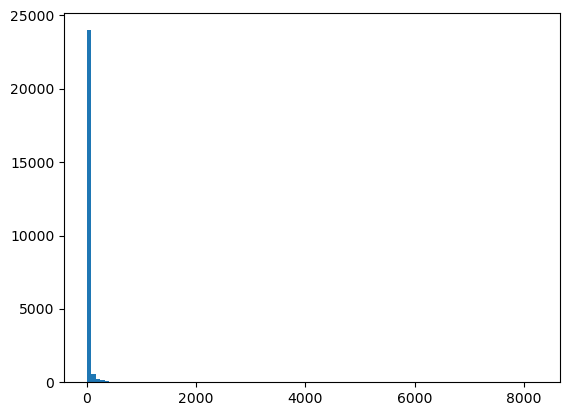

L_PaidAmt


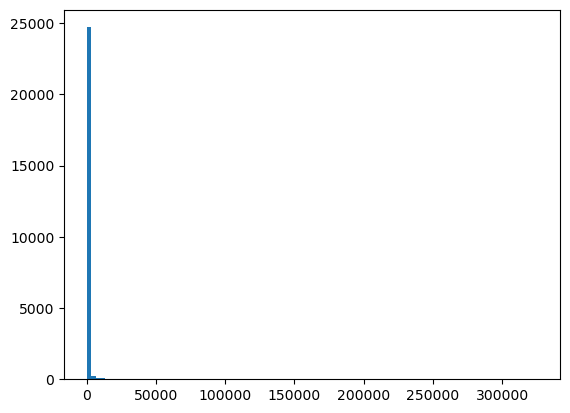

T_PaidAmt


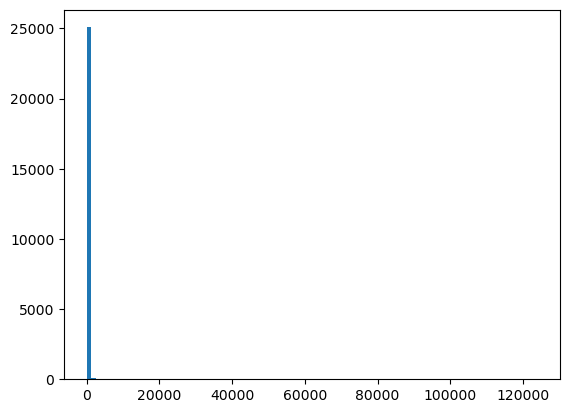

Encore


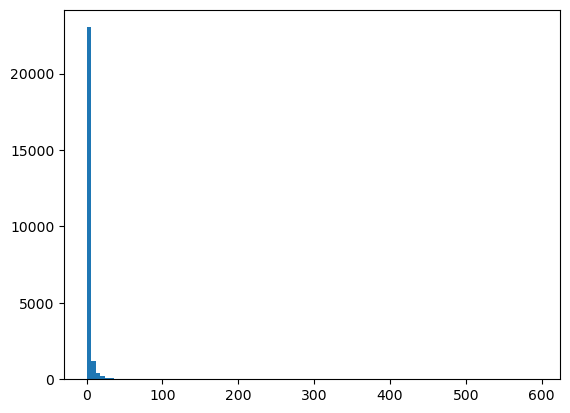

CRM


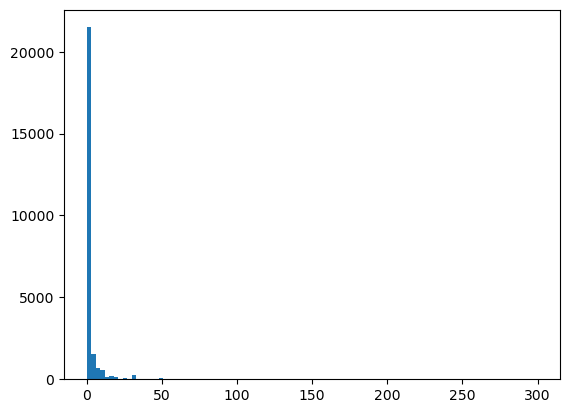

Frequency


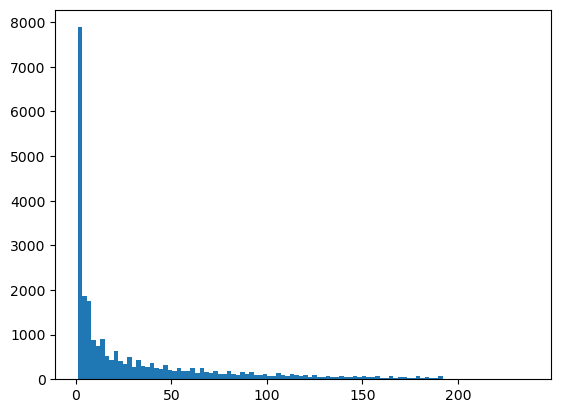

Recency


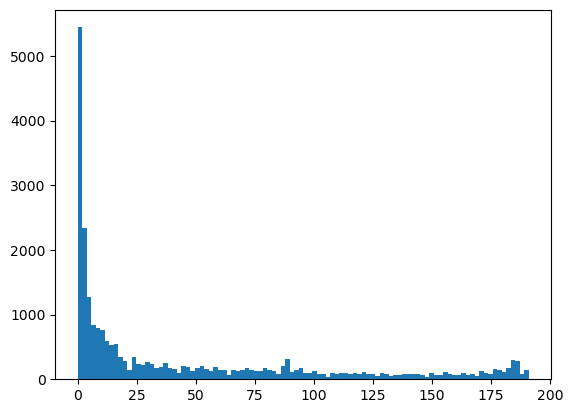

NewProduct_%


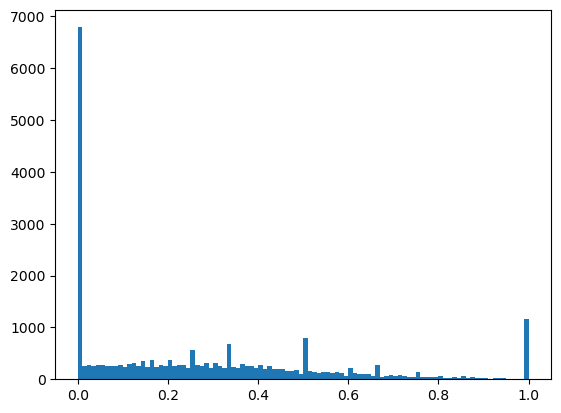

In [61]:
for column in result_sample_df.columns:
    print(column)
    plt.hist(result_sample_df[column],bins=100)
    plt.show()

In [62]:
df_transformed = np.log(result_sample_df+1)
df_transformed['NetWin'] = np.log((result_sample_df['NetWin']-min(result_sample_df['NetWin']))+1)

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning:

divide by zero encountered in log

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning:

invalid value encountered in log



PlayerLifeYears


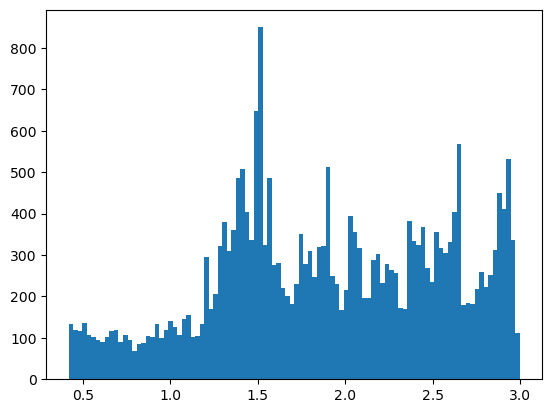

SessionTimeHr


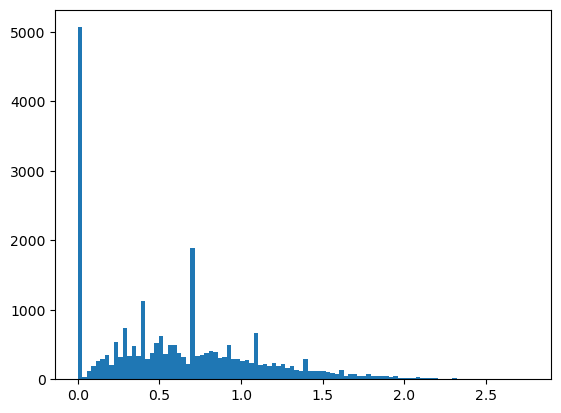

DepositAmt


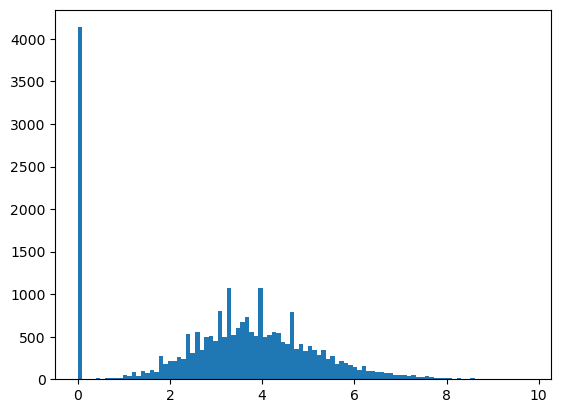

WithdrawalAmt


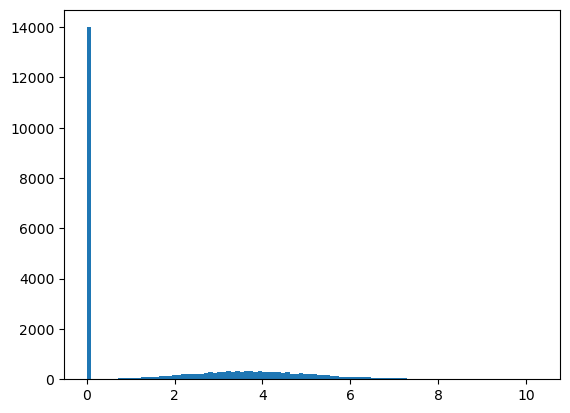

ProductCount


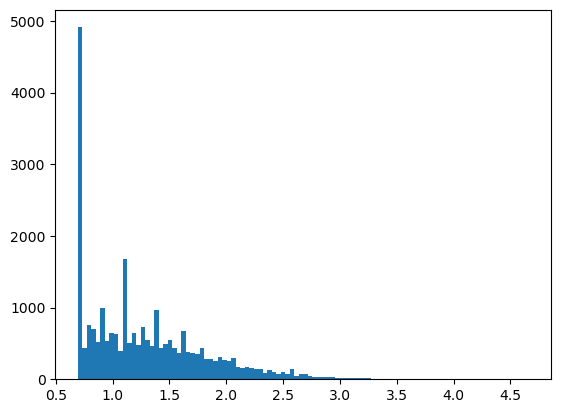

NewProductCount


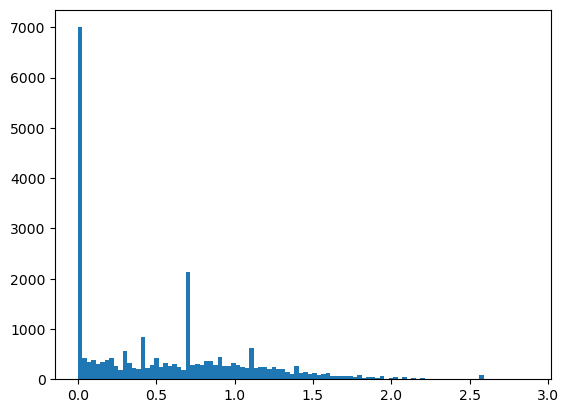

NetWin


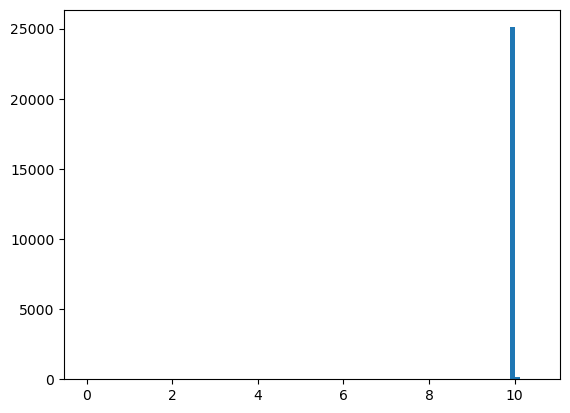

PaidAmt


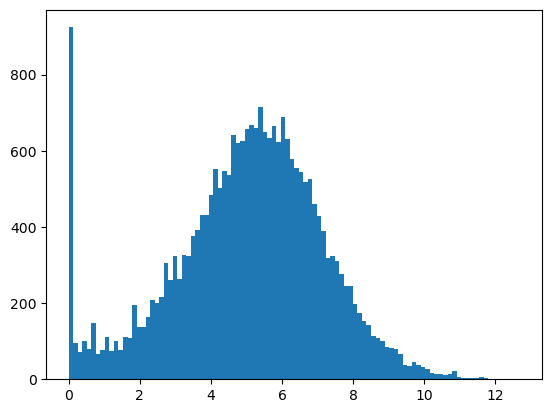

S_PaidAmt


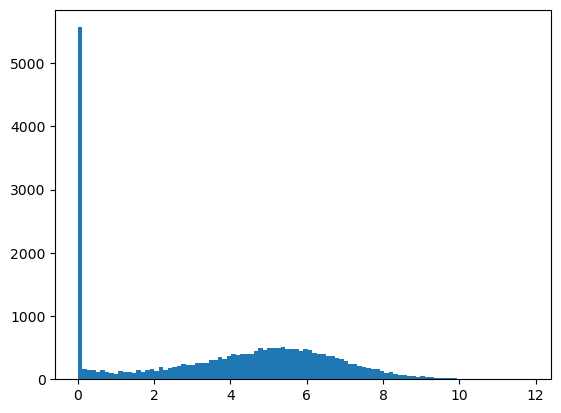

P_PaidAmt


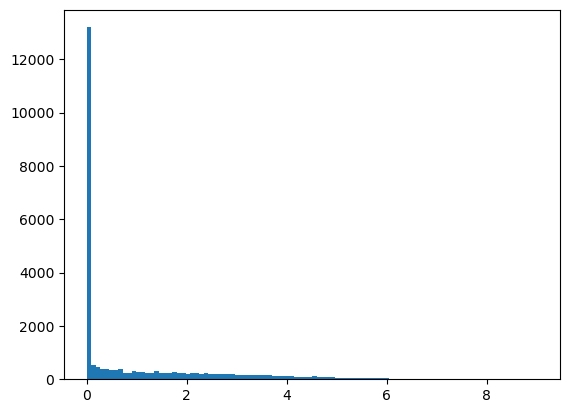

L_PaidAmt


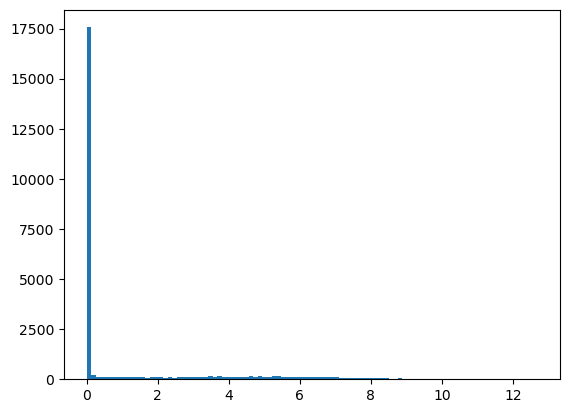

T_PaidAmt


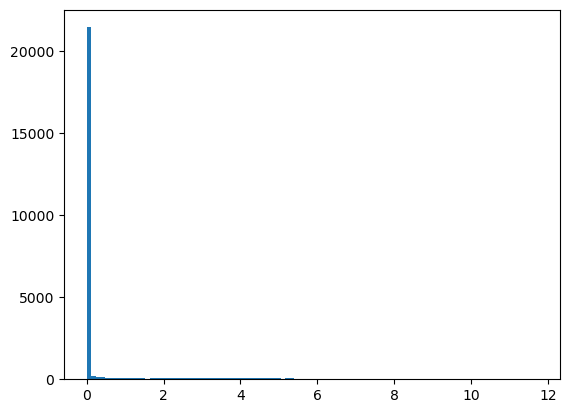

Encore


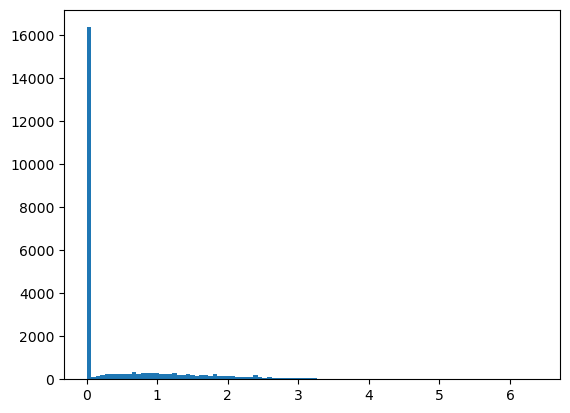

CRM


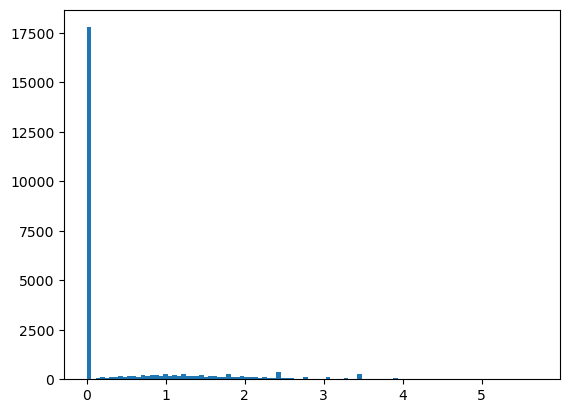

Frequency


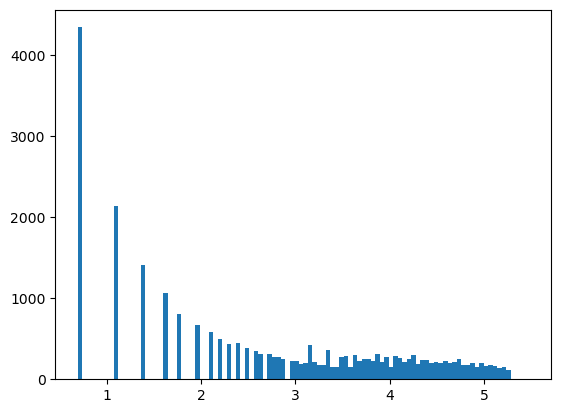

Recency


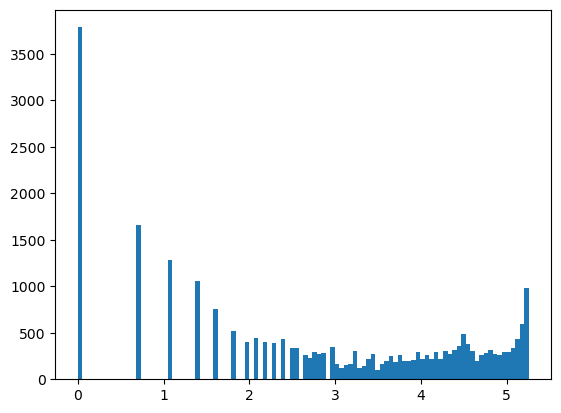

NewProduct_%


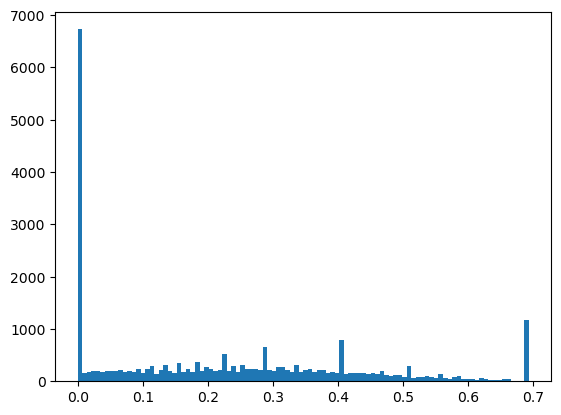

In [63]:
for column in df_transformed.columns:
    print(column)
    plt.hist(df_transformed[column],bins=100)
    plt.show()

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Tools
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
# Look at a dendogram for hierarchical 
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [65]:
df_scaled = df_transformed.copy()

In [66]:
# Extract the columns you want to scale
columns_to_scale = ['PlayerLifeYears','SessionTimeHr', 'DepositAmt', 'WithdrawalAmt', 'ProductCount',  'PaidAmt', 'Encore', 'CRM', 'Recency', 'Frequency']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the columns to scale
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

In [67]:
model  = PCA(n_components=3)
pca_transformed  = model.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_transformed)

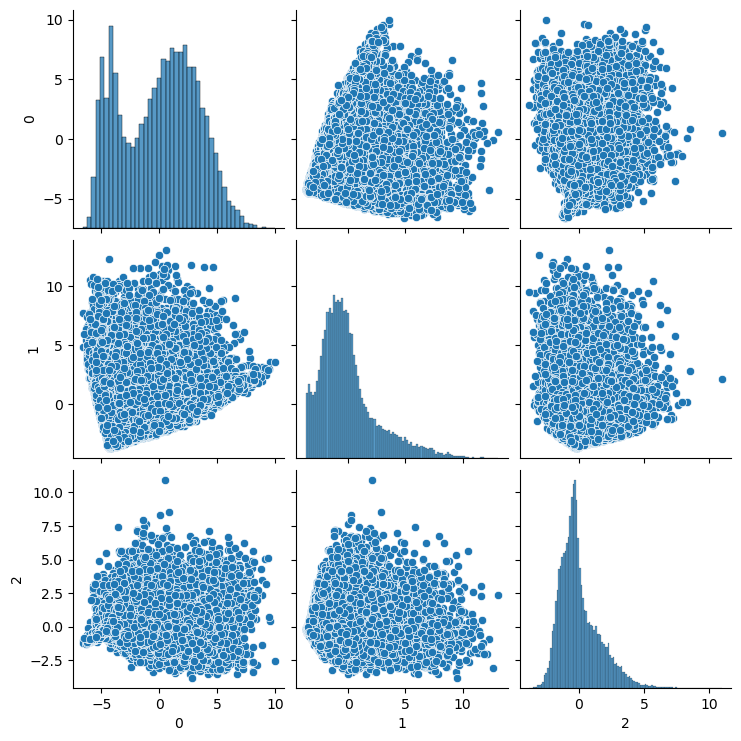

In [68]:
sns.pairplot(df_pca)

# Kmeans

In [69]:
clusters = []
inertia = []
sil_score = []

for k in range(2,27): 
    kmeans_model = KMeans(n_clusters=k)
    labels = kmeans_model.fit_predict(df_scaled)
    inertia.append(kmeans_model.inertia_)
    clusters.append(k)
    sil_score.append(silhouette_score(df_scaled, labels))

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\si

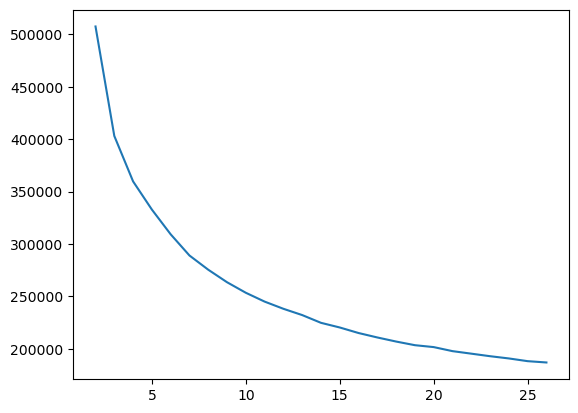

In [70]:
#inertia  plot
plt.plot(clusters, inertia)

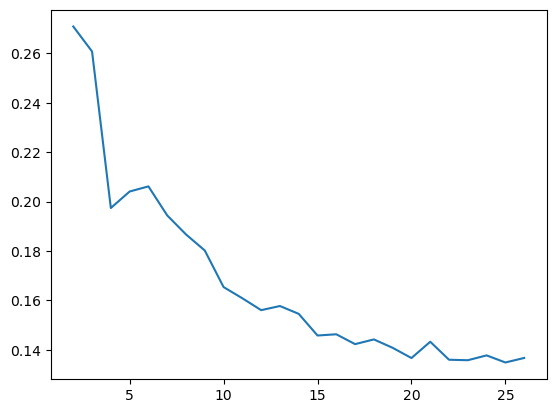

In [71]:
# sil score
plt.plot(clusters, sil_score)

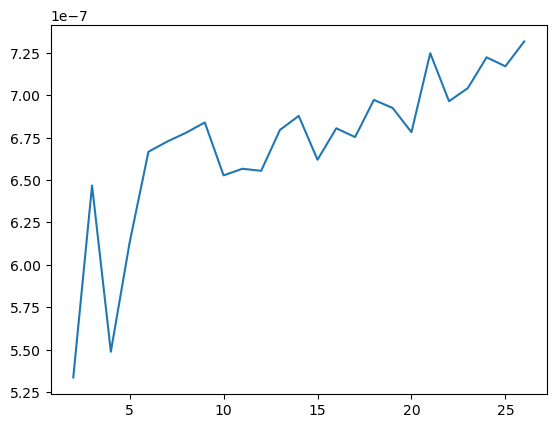

In [72]:
# Convert the lists to NumPy arrays
sil_score = np.array(sil_score)
inertia = np.array(inertia)

# Perform element-wise division
silhouette_scores = sil_score / inertia
# sil score
plt.plot(clusters, silhouette_scores)

In [73]:
kmeans_model = KMeans(6)
kmeans_labels = kmeans_model.fit_predict(df_scaled)

C:\Users\jverdugo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [74]:
df_kmeans = result_sample_df.copy()
df_kmeans['kmeans_labels'] = kmeans_labels

In [75]:
df_pca_kmeans = df_pca.copy()

In [76]:
df_pca_kmeans['kmeans_labels'] = kmeans_labels

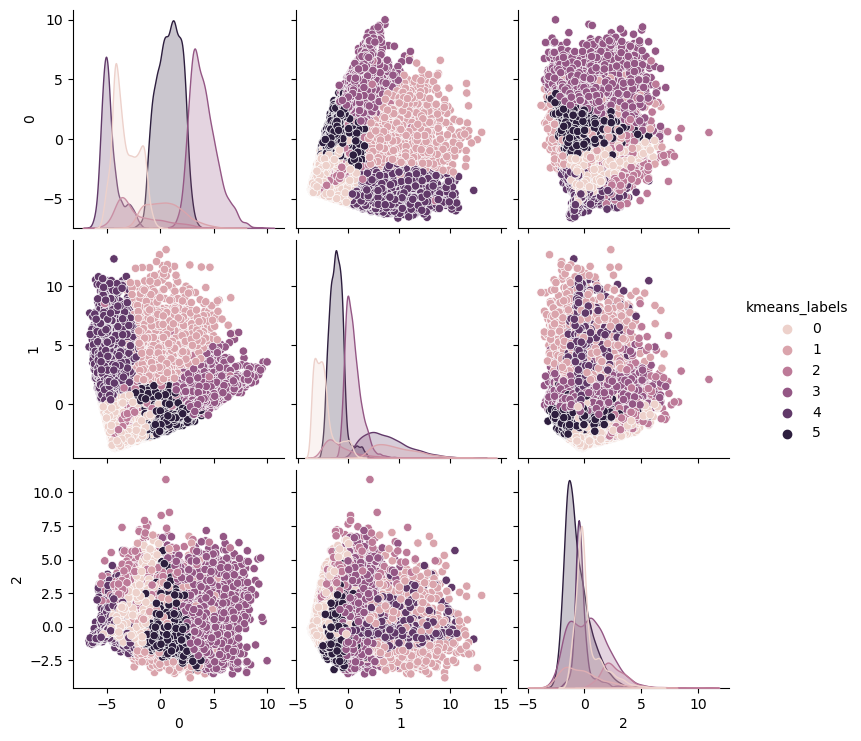

In [77]:
sns.pairplot(df_pca_kmeans, hue = 'kmeans_labels')

# DBSCAN

In [78]:
clusters = []
sil_score = []
epsilons = list(np.arange(2.2, 4.2, 0.1)
               )

for k in epsilons: 
    dbscan_model = DBSCAN(eps=k)
    labels = dbscan_model.fit_predict(df_scaled)
    cluster =  sum(np.unique(labels)!=-1)
    clusters.append(cluster)
    sil_score.append(silhouette_score(df_scaled, labels))

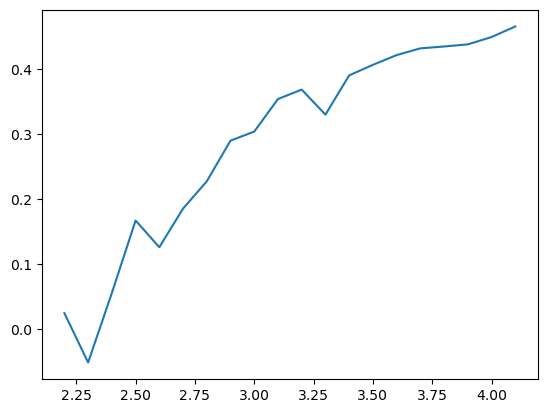

In [79]:
plt.plot(epsilons, sil_score)

In [80]:
dbscan_model = DBSCAN(eps=  2.6, min_samples=8)
dbscan_labels = dbscan_model.fit_predict(df_scaled)

In [81]:
df_dbscan = result_sample_df.copy()
df_dbscan['dbscan_labels'] = dbscan_labels

In [82]:
df_pca_dbscan = df_pca.copy()

In [83]:
df_pca_dbscan['dbscan_labels'] = dbscan_labels

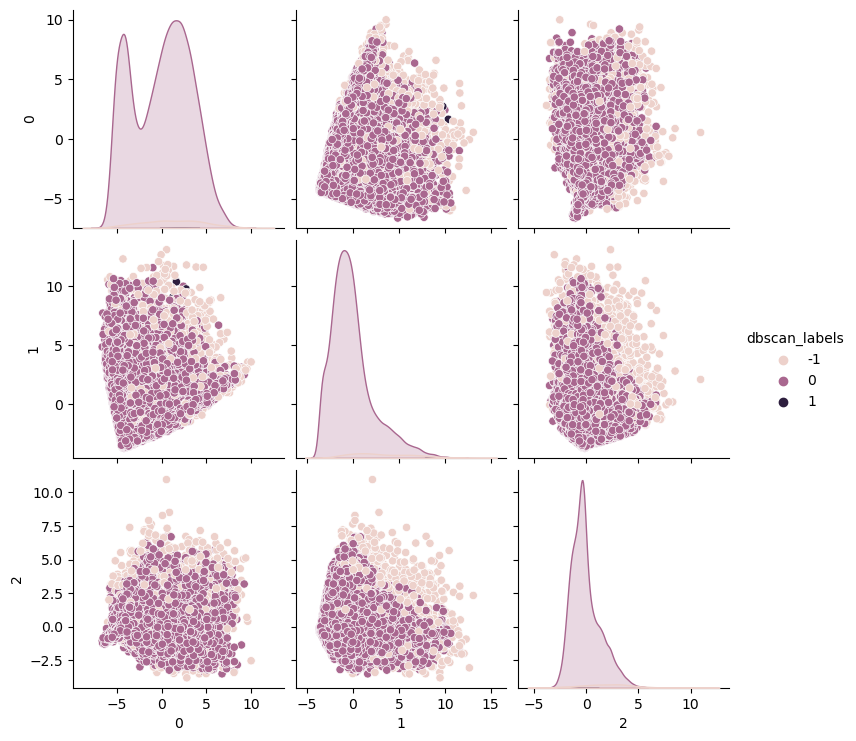

In [84]:
sns.pairplot(df_pca_dbscan, hue = 'dbscan_labels')

# Agglomerative

In [85]:
clusters = []
sil_scores = []
for i in range(2,13):
    model = AgglomerativeClustering(i, linkage="ward")
    clusters.append(i)
    sil_scores.append(silhouette_score(df_scaled,  model.fit_predict(df_scaled)))

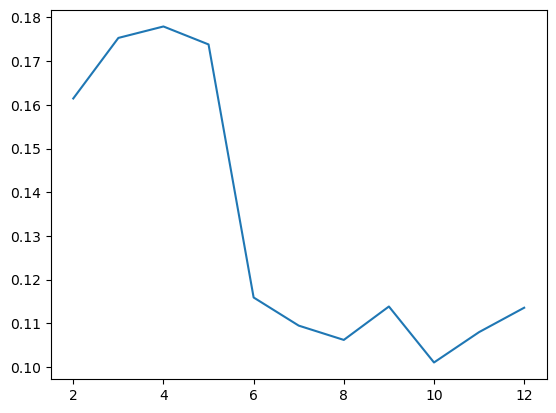

In [86]:
plt.plot(clusters, sil_scores)

In [87]:
agglo_model = AgglomerativeClustering(5)
aggl_labels = agglo_model.fit_predict(df_scaled)

In [88]:
df_agglo = result_sample_df.copy()
df_agglo['agglo_labels'] = aggl_labels

In [89]:
df_pca_agglo = df_pca.copy()
df_pca_agglo['agglo_labels'] = aggl_labels

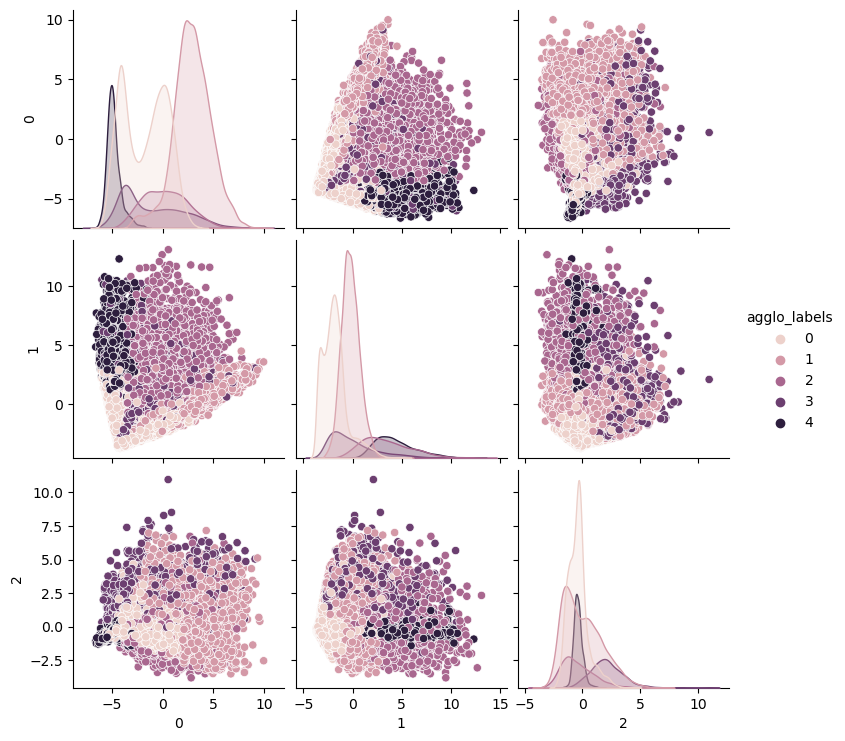

In [90]:
sns.pairplot(df_pca_agglo, hue = 'agglo_labels')

# Gaussian Mixture

In [91]:
from sklearn.mixture import GaussianMixture

In [92]:
components = []
sil_score = []

for k in range(2,13): 
    gm_model = GaussianMixture(n_components=k)
    components_labels = gm_model.fit_predict(df_scaled)
    components.append(k)
    sil_score.append(silhouette_score(df_scaled, components_labels))

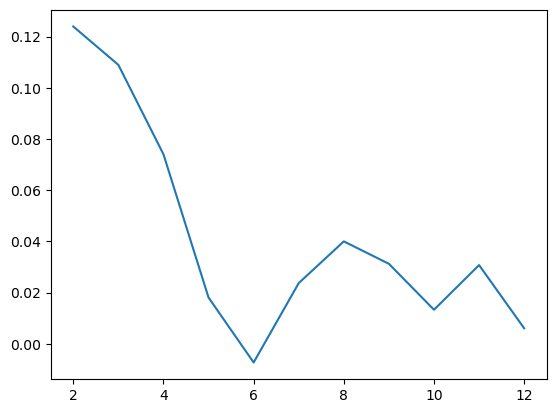

In [93]:
#inertia  plot
plt.plot(components, sil_score)

In [94]:
gm_model =GaussianMixture(7)
gm_labels = gm_model.fit_predict(df_scaled)

In [95]:
df_gm = result_sample_df.copy()
df_gm['gm_labels'] = gm_labels

In [96]:
df_pca_gm = df_pca.copy()

In [97]:
df_pca_gm['gm_labels'] = gm_labels

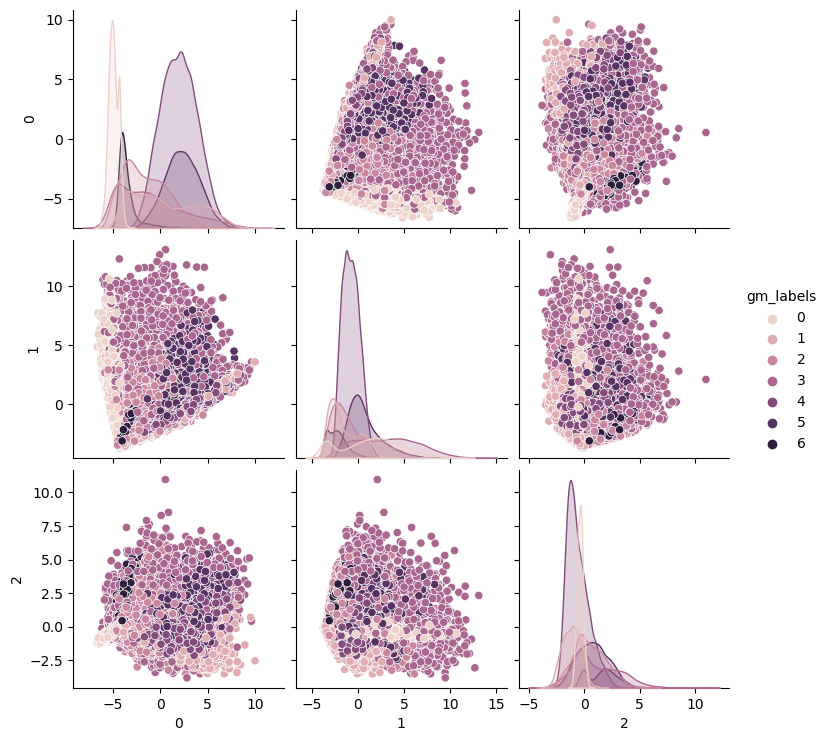

In [98]:
sns.pairplot(df_pca_gm, hue = 'gm_labels')

In [99]:
df_kmeans

PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
Player                                                               
7543141         0.531507       0.612903   54.758065      36.129032   
831631         10.498630       5.564516  268.279570      51.075269   
188583         12.920548       1.750000   44.000000      18.750000   
4799223         5.271233       2.605769  265.519231     358.846154   
1394807         0.893151       0.000000    8.333333      -0.000000   
...                  ...            ...         ...            ...   
1507554        15.934247       0.000000    6.000000      -0.000000   
1589778         6.008219       0.000000    0.000000      -0.000000   
766775         12.282192       0.300000   45.000000      -0.000000   
3656633         1.394521       0.200000   80.000000      -0.000000   
1294005         8.060274       0.000000    0.000000      -0.000000   

         ProductCount  NewProductCount      NetWin      PaidAmt    S_PaidAmt  \
Player                                                                         
7543141      3.532258         0.564516   19.078710   211.804032   211.420161   
831631      12.172043         3.548387  190.924301  3459.139946  3110.191290   
188583       3.250000         0.750000   33.252375   584.723500   582.111000   
4799223      6.355769         1.403846  112.587115  1801.471346   562.366058   
1394807      1.000000         0.000000    1.333333     2.666667     0.000000   
...               ...              ...         ...          ...          ...   
1507554      1.000000         0.000000    1.425000     1.850000     0.000000   
1589778      1.000000         0.000000    6.000000    27.750000     0.000000   
766775       1.500000         0.900000    4.545000    22.150000    21.150000   
3656633      1.400000         0.000000   76.300000   589.200000     0.000000   
1294005      7.000000         0.000000   12.330000    53.450000    38.550000   

          P_PaidAmt    L_PaidAmt  T_PaidAmt     Encore       CRM  Frequency  \
Player                                                                        
7543141    0.383871     0.000000   0.000000   1.096774  0.000000         62   
831631   348.760484     0.161290   0.026882  14.403226  0.000000        186   
188583     2.612500     0.000000   0.000000   2.915000  0.000000         80   
4799223    0.755769  1238.349519   0.000000   3.644808  3.365385        104   
1394807    0.000000     2.666667   0.000000   0.000000  0.000000          6   
...             ...          ...        ...        ...       ...        ...   
1507554    0.000000     0.000000   1.850000   0.000000  5.000000          2   
1589778    0.000000    27.750000   0.000000   0.000000  0.000000          1   
766775     1.000000     0.000000   0.000000   0.000000  0.000000         10   
3656633    0.000000   589.200000   0.000000   0.000000  0.000000          5   
1294005   14.900000     0.000000   0.000000   0.000000  0.000000          1   

         Recency  NewProduct_%  kmeans_labels  
Player                                         
7543141       15      0.159817              5  
831631         0      0.291519              3  
188583         0      0.230769              3  
4799223        6      0.220877              1  
1394807       87      0.000000              0  
...          ...           ...            ...  
1507554       87      0.000000              0  
1589778      125      0.000000              0  
766775         1      0.600000              5  
3656633       57      0.000000              4  
1294005       49      0.000000              5  

[25285 rows x 18 columns]

In [100]:
# Count the occurrences of each segment and store it in a DataFrame
segment_counts = df_kmeans['kmeans_labels'].value_counts().reset_index()
segment_counts.columns = ['kmeans_labels', 'PlayerCount']

temp_df = df_kmeans.groupby('kmeans_labels').mean().reset_index()
# Sort the DataFrame by "PaidAmt" in descending order
temp_df= temp_df.sort_values(by='PaidAmt', ascending=False)

# Merge the player count DataFrame with temp_df
temp_df = temp_df.merge(segment_counts, on='kmeans_labels', how='left')

# Reorganize the "kmeans_labels" based on the new order
temp_df['kmeans_labels'] = range(len(temp_df))
temp_df

kmeans_labels  PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
0              0         6.549872       1.635469  285.320260     234.913257   
1              1         5.903295       1.249253  195.187153     170.042227   
2              2         7.958811       1.925915  206.050432     152.824346   
3              3         8.351889       1.065824  100.839899      65.372837   
4              4         6.967457       0.737204   38.448645      11.162791   
5              5         7.199551       0.403538    9.124171       2.285443   

   ProductCount  NewProductCount      NetWin      PaidAmt    S_PaidAmt  \
0      3.926947         1.160964  131.282741  3435.083705   756.648780   
1      1.588126         0.141262   85.047389  2293.941206     1.401004   
2      5.582563         1.757308   84.710985  1808.170920  1729.426165   
3      2.008853         0.388138   53.407021  1486.522902    59.559814   
4      3.381200         1.287056   26.463817   183.290767   175.820128   
5      1.688181         0.557025    3.535948    19.025032     3.006080   

   P_PaidAmt    L_PaidAmt    T_PaidAmt    Encore       CRM  Frequency  \
0  34.789301  2547.235681    96.409960  4.337883  1.320494  41.180556   
1   0.935368  2282.517561     9.087274  0.570832  0.875722  18.604482   
2  68.146931     0.791627     9.806261  6.220578  2.188358  72.418173   
3   6.480797    31.860074  1388.622216  1.051311  1.154944  19.572464   
4   6.150797     0.783841     0.536415  0.661485  1.164507  22.412443   
5  13.014032     2.362528     0.642440  0.529608  5.711291   4.950736   

     Recency  NewProduct_%  PlayerCount  
0  26.758207      0.274361         1584  
1  55.232323      0.065973         3168  
2  13.078760      0.311474         6196  
3  55.093398      0.167079         1242  
4  44.510231      0.346108         8406  
5  89.168053      0.290296         4689

In [101]:
grouped_kmeans = temp_df.melt(id_vars='kmeans_labels').sort_values('value')

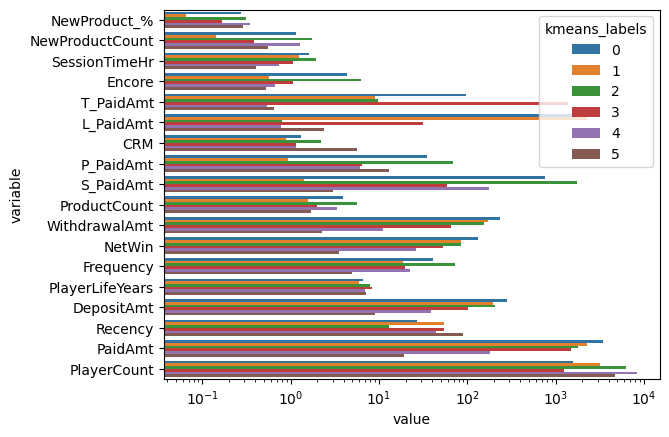

In [102]:
sns.barplot(x = 'value',
           y = 'variable', 
           hue = 'kmeans_labels', 
           data =  grouped_kmeans)
# Set the x-axis scale to logarithmic
plt.xscale('log')
# Show the plot
plt.show()

In [103]:
import plotly.express as px

# Exclude 'kmeans_labels' from the list of metrics
metrics = temp_df.columns[1:]

# Create separate bar plots for each metric with gradients of blues
for metric in metrics:
    fig = px.bar(temp_df, x='kmeans_labels', y=metric, 
                 labels={'kmeans_labels': 'Segment', metric: metric},
                 title=f'For the entire period 2023 {metric}')

    # Define a custom color scale ranging from dark to light blue
    num_segments = len(temp_df['kmeans_labels'].unique())
    colors = px.colors.sequential.Blues[::-1]  # Reverse the default Blues color scale
    
    # Assign colors to segments based on their order
    segment_colors = {label: colors[i] for i, label in enumerate(temp_df['kmeans_labels'].unique())}
    
    fig.update_traces(marker=dict(
        color=[segment_colors[label] for label in temp_df['kmeans_labels']]
    ))

    fig.show()

In [104]:
temp_df = df_agglo.groupby('agglo_labels').mean().reset_index()
temp_df

agglo_labels  PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
0             0         6.974705       0.527942   15.999492       5.640809   
1             1         7.644338       1.473562  142.596846      94.722718   
2             2         6.495619       1.376907  202.897190     161.921151   
3             3         7.929479       1.139196  114.653491      86.698702   
4             4         5.647027       1.386362  254.747041     220.099698   

   ProductCount  NewProductCount      NetWin      PaidAmt    S_PaidAmt  \
0      2.426029         0.929869    8.943734    52.280854    40.993403   
1      4.575556         1.452976   65.246874  1161.085553  1110.351208   
2      3.801131         1.242803   92.894678  2297.222158   618.945997   
3      2.836858         0.720509   56.574267  1471.066708   353.141040   
4      1.528555         0.088636  109.437132  3038.998100     0.542376   

   P_PaidAmt    L_PaidAmt   T_PaidAmt    Encore       CRM  Frequency  \
0   1.738169     9.438796    0.110891  0.640604  3.916184  10.255984   
1  50.370126     0.247816    0.116462  3.837662  1.506478  53.213057   
2  25.678731  1578.917723   73.679729  3.374749  1.246579  37.812672   
3  14.517015   355.651180  747.757473  1.587021  1.215594  27.562631   
4   0.071995  3038.261747    0.121981  0.790989  1.008650  21.490243   

     Recency  NewProduct_%  
0  72.954915      0.313040  
1  24.697513      0.310248  
2  31.438410      0.303860  
3  44.510264      0.209374  
4  50.820086      0.043685

In [105]:
grouped_agglo = temp_df.melt(id_vars='agglo_labels').sort_values('value')

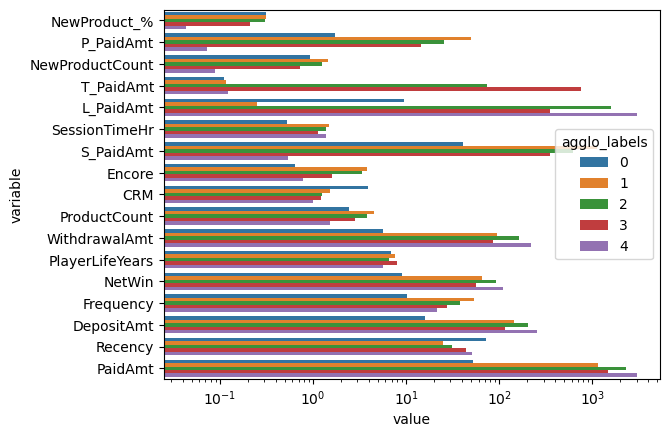

In [106]:
sns.barplot(x = 'value',
           y = 'variable', 
           hue = 'agglo_labels', 
           data =  grouped_agglo)
# Set the x-axis scale to logarithmic
plt.xscale('log')
# Show the plot
plt.show()

In [107]:
temp_df = df_dbscan.groupby('dbscan_labels').mean().reset_index()
temp_df

dbscan_labels  PlayerLifeYears  SessionTimeHr  DepositAmt  WithdrawalAmt  \
0             -1         7.892978       2.463361  571.807819     558.794667   
1              0         7.132057       1.045768   92.930504      60.576316   
2              1         3.125342       4.641653  814.177370    1704.172721   

   ProductCount  NewProductCount      NetWin       PaidAmt    S_PaidAmt  \
0      5.253916         1.431620  240.093840   8165.339123  2611.544840   
1      3.269180         1.056271   43.814269    785.389961   446.354158   
2      3.401928         0.878740  230.415822  12326.325504  1181.133538   

    P_PaidAmt     L_PaidAmt    T_PaidAmt     Encore       CRM   Frequency  \
0  175.495979   3914.667971  1463.630334  13.025126  4.890992   41.753452   
1   17.434926    301.395393    20.205653   1.784584  2.120949   31.567808   
2    9.286740  11135.905226     0.000000  14.454247  0.000000  100.000000   

     Recency  NewProduct_%  
0  35.908284      0.239776  
1  46.261466      0.280522  
2  11.750000      0.256911

In [108]:
grouped_dbscan = temp_df.melt(id_vars='dbscan_labels').sort_values('value')

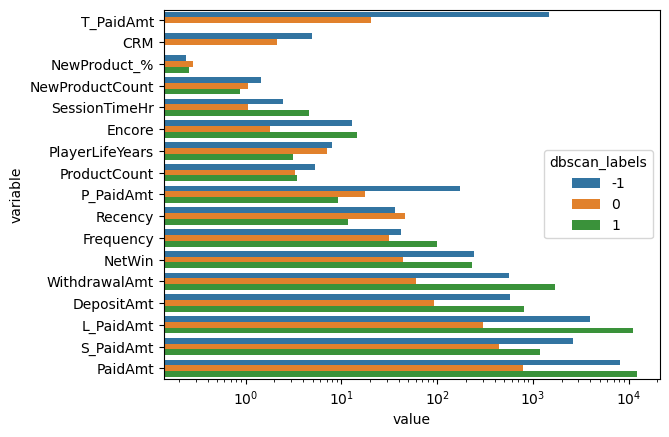

In [109]:
sns.barplot(x = 'value',
           y = 'variable', 
           hue = 'dbscan_labels', 
           data =  grouped_dbscan)
# Set the x-axis scale to logarithmic
plt.xscale('log')
# Show the plot
plt.show()